## Исследование данных о российском кинопрокате



В нашем распоряжении данные опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

**Цель исследования:**
Изучить рынок российского кинопроката и выявить текущие тренды. Выделить фильмы, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю. Заказчик этого исследования — Министерство культуры Российской Федерации.

- посмотрим, сколько фильмов выходило в прокат каждый год.

- изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

- с помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года. Сравним значения.

- определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

- иссдедуем фильмы, которые уже получили государственную поддержку

**Ход исследования:**

Для исследования предоставлены 2 набора данных:

1. Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма.

Известно, что столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.
* `puNumber` — номер прокатного удостоверения;
* `box_office` — сборы в рублях.

О качестве данных ничего не известно. Поэтому перед исследованием понадобится обзор данных.

Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в три этапа:

1. [Изучение данных из файла.](#explore) 
2. [Предобработка данных.](#preprocessing)
3. [Исследовательнский анализ и выводы.](#conclusion)

### Откройте файлы с данными и объедините их в один датафрейм. 
Для исследования необходимо объединить данные из двух датасетов `mkrf_movies` и `mkrf_shows` в один. Чтобы определить как оптимальнее объединить данные, посмотрим на оба датасета и информацию о них.

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# отображаем данные без экспоненциальных чисел
pd.options.display.float_format = '{:,.2f}'.format
# отображаем все столбцы в данных
pd.set_option("display.max_columns", None)


In [4]:
# проверка на путь
if os.path.exists('/datasets/mkrf_movies.csv'):
    path = '/datasets/'
else:
    path = './'
    
# загружаем датасет в df
df = pd.read_csv(path+'mkrf_movies.csv')

# проверка загрузки данных и отображение первых 10 строк
df.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


Файл открылся, посмотрим на общую информацию о файле.

In [5]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

15 колонок, три из них в формате `float64`, остальные `object`. Всего 7486 строк, в некоторых есть пропуски. Наименования столбцов соответствуют документации.

Посмотрим на второй датафрейм `mkrf_shows`, с которым необходимо соединить `mkrf_movies`

In [6]:
# проверка на путь
if os.path.exists('/datasets/mkrf_shows.csv'):
    path = '/datasets/'
else:
    path = './'
    
# загружаем датасет в dfd
dfd = pd.read_csv(path+'mkrf_shows.csv')

# проверка загрузки данных и отображение первых 10 строк
dfd.head(10)

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"
5,111000119,"4,293,649.51"
6,111000212,200.00
7,111000216,"355,567.00"
8,111000313,710.00
9,111000314,"1,607,970.00"


Файл загрузился, посмотрим на общую информацию `mkrf_shows`

In [7]:
# получение общей информации о данных в таблице dfd
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


2 колонки, 3158 строк, пропусков нет.
В обоих датафреймах есть колонка `puNumber`, по которой можно сопоставить данные при объединении. Но в `mkrf_movies` он в формате `object`, а в `mkrf_shows` в формате `int64`.

Судя по первым строчкам `mkrf_movies`, в колонке `puNumber` должны быть номера в целочисленном формате. Но почему формат `object`? Посмотрим на уникальные значения в `puNumber`, отсортировав их по возрастанию.

In [8]:
# сортируем значения в puNumber по возрастанию и смотрим уникальные
df.sort_values(by='puNumber')['puNumber'].unique()

array([' 111004112', '111000110', '111000111', ..., '231001012',
       '231001111', 'нет'], dtype=object)

Видно значение 'нет'. Посмотрим, сколько строк с этим значением.

In [9]:
# в df отфильтровываем строчки со значением 'нет' в колонке puNumber
df[df['puNumber']=='нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Всего 1 строчка. Из 7486 это ничтожно мало. Удалим эту строчку.

In [10]:
# удаляем строки со значением 'нет' в колонке puNumber
df=df[df['puNumber']!='нет']
# сортируем значения в puNumber по возрастанию и смотрим уникальные
df.sort_values(by='puNumber')['puNumber'].unique()

array([' 111004112', '111000110', '111000111', ..., '226019110',
       '231001012', '231001111'], dtype=object)

Теперь все значения цифровые, изменим формат `puNumber` в `mkrf_movies` с `object` на `int64`.

In [11]:
# изменяем формат puNumber на целочисленный
try:
    df['puNumber']=df['puNumber'].astype('int')
except:
    print ("Ошибка")

In [12]:
# проверяем получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Типы данных совпадают, названия столбцов `puNumber` совпадают, объединим таблицы `mkrf_movies` и `mkrf_shows`

In [13]:
# соединяем таблицы mkrf_movies и mkrf_shows в переменную df
df=df.merge(dfd, on='puNumber', how='outer')
# получение первых 10 строк таблицы df
df.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


Также посмотрим на случайную выборку данных, т.к. в начале и в конце таблицы данные могут сильно отличаться от всего набора.

In [14]:
# получение случайных 10 строк таблицы df
df.sample(10, random_state=42)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2826,Рок на Востоке,121022615,2015-11-09T12:00:00.000Z,Художественный,"Дьюн Филмз, Квед Интертейнмент, Шангри-Ла Инте...",США,Барри Левинсон,"Стив Бинг, Билл Блок, Митч Глейзер",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.6,"комедия,военный,музыка","1,337,996.90"
6956,Тайная жизнь домашних животных 2,124003519,2019-05-25T12:00:00.000Z,Анимационный,"Иллюминейшн Интертейнмент, Юниверсал Пикчерз","США, Франция, Япония",Крис Рено,Лиз-Мари Амар,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.8,"мультфильм,комедия,приключения","1,478,921,168.46"
3014,Братья из Гримсби,121004116,2016-02-24T12:00:00.000Z,Художественный,"Биг Толк Продакшнз, Коламбиа Пикчерз, Фор бай ...",США,Луи Летеррье,"Саша Барон Коэн, Нира Парк",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.4,"боевик,триллер,комедия","140,501,616.00"
6569,Позвоните Мышкину,111025718,2018-12-25T12:00:00.000Z,Художественный,"ООО ""ТПО ""РОК""",Россия,И.Казанков,"А.Учитель, К.Саксаганская",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.3,комедия,NaN
4606,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221160510,2010-12-17T12:00:00.000Z,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
4355,Красавчик,221050610,2010-04-19T12:00:00.000Z,Художественный,"Медианборд Берлин/Бранденбург, Севен Пикчерз, ...",Германия,Тиль Швайгер,Тиль Швайгер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"мелодрама,комедия",NaN
6813,Венецианский детектив,121005119,2019-04-15T12:00:00.000Z,Художественный,К +,Италия,Антонио Падован,"Алессия Гатти, Валентина Занелла, Никола Федри...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"комедия,детектив","2,662,824.50"
468,Король Лев,224025412,2012-10-23T12:00:00.000Z,Анимационный,"Уолт Дисней Пикчерз, Буена Виста Интернешнл",США,"Роб Минкофф, Роджер Аллерс",Дон Хан,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.8,"мультфильм,мюзикл,драма",NaN
3127,Игра на понижение,221025416,2016-05-30T12:00:00.000Z,Художественный,"План Б Интертейнмент, Ридженси Интерпрайзис, П...",США,Адам МакКей,"Деде Гарднер, Брэд Питт",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.3,"драма,комедия,биография",NaN
1295,Пластик,121011314,2014-06-05T12:00:00.000Z,Художественный,Гетувей Филмз,Великобритания,Джулиан Джилби,"Джеймс Дэйли, Жак Уаниш, Жан-Доминик Чоачан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"боевик,драма,комедия","2,080.00"


In [15]:
# проверяем получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

#### Вывод

Была удалена одна строчка со значением 'нет' в столбце `puNumber`, затем преобразован тип значений этого столбца на `int64` и 2 таблицы  были объединены `mkrf_movies` и `mkrf_shows` в переменную `df` с сохраннеием всех строк.

По итогу имеем датафрейм со следующими столбцами:
* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма.
* `box_office` — сборы в рублях.

В нем осталось 7485 строк, и стало 16 столбцов.
Данные в столбцах в основном типа `object` (`refundable_support`, `nonrefundable_support`, `budget` - `float64`; `puNumber` - `int64`)
Названия столбцов выдержаны в едином стиле, кроме `puNumber`. Исправим это.
Видно, что в данных есть пропуски.
В первых и случайных 10-ти строчках, аномалий на первый взгляд не обнаружено.
Посмотрим подоробнее на данные в каждой колонке.

### Предобработка данных

В начале предобработки приведем название столбцов к единому стилю. Выбивается один столбец `puNumber`. Исправим название на `pu_number`

In [16]:
# переименование столбцов
df=df.rename(columns={
    'puNumber':'pu_number'})
# проверим переименование
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

#### Провека типов данных

Проверим типы данных в датафрейме и преобразуйте их там, где это необходимо.
Выше отображена общая информация. Многим данным подходит тип `object`.
Но для `show_start_date` будет лучше формат `datetime64` (пропусков в этом столбце нет, проблем возникнуть не должно), а для `ratings` - `float64` (пропуски NaN есть, но они как раз имеют тип `float64`)


In [17]:
# меняем формат show_start_date
try:
    df['show_start_date']=pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M')
except:
    print ("Ошибка даты")
    
# изменяем формат вещественное число в ratings
try:
    df['ratings']=df['ratings'].astype('float')
except:
    print ("Ошибка рейтинга")
# проверяем изменения
df.head()

Ошибка рейтинга


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Формат даты изменился без ошибок, а с рейтингом есть проблемы. Посмотрим на уникальные значения в этой колонке.

In [18]:
# сортируем значения в ratings по возрастанию и смотрим уникальные
df.sort_values(by='ratings')['ratings'].unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

Теперь понятно, почему тип данных `object` и на `float` не меняется. Формат рейтига в процентах выбивается из общей картины. Приведем все к единому виду. Заменим оценку в процентах на 10-ти бальную.

In [19]:
# в цикле перебираем значения в столбце ratings. Если значение содержит "%", делим числовую часть на 10
for index in range(0,len(df['ratings'])):
    if '%' in str(df['ratings'][index]):
        df['ratings'][index]=float(df['ratings'][index][:-1])/10

# изменяем формат вещественное число в ratings
try:
    df['ratings']=df['ratings'].astype('float')
except:
    print ("Ошибка рейтинга")

# проверяем изменения в ячейках
display(df.sort_values(by='ratings')['ratings'].unique())

# проверим изменение типов данных
df.info()

C:\Users\aivon\AppData\Local\Temp\ipykernel_5276\4131177407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratings'][index]=float(df['ratings'][index][:-1])/10


array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.4, 9.7, 9.8, 9.9, nan])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   int32              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Типы данных изменили в двух столбцах: `show_start_date` на `datetime64`, `ratings` на `float64`. В втором значения привели к единому 10-ти бальному формату. Надо отметить, что нулевых значений в `ratings` нет.

####  Заполнение пропусков, проверка на явные дубликаты

Посмотрим, сколько пропусков есть в таблице и в каких колонках.

In [20]:
# подсчет пропусков и визуализация процентного соотношения пропусков
display(pd.DataFrame(round((df.isna().mean()*100),2).sort_values(ascending=False), columns=['NaNs, %']).style.format(
    '{:.2f}').background_gradient('bwr'))
df.isna().sum().sort_values(ascending=False)

,"NaNs, %"
refundable_support,95.56
nonrefundable_support,95.56
budget,95.56
financing_source,95.56
box_office,57.81
genres,13.03
ratings,12.91
producer,7.59
film_studio,0.24
director,0.12


refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
box_office               4327
genres                    975
ratings                   966
producer                  568
film_studio                18
director                    9
production_country          2
title                       0
pu_number                   0
show_start_date             0
type                        0
age_restriction             0
dtype: int64

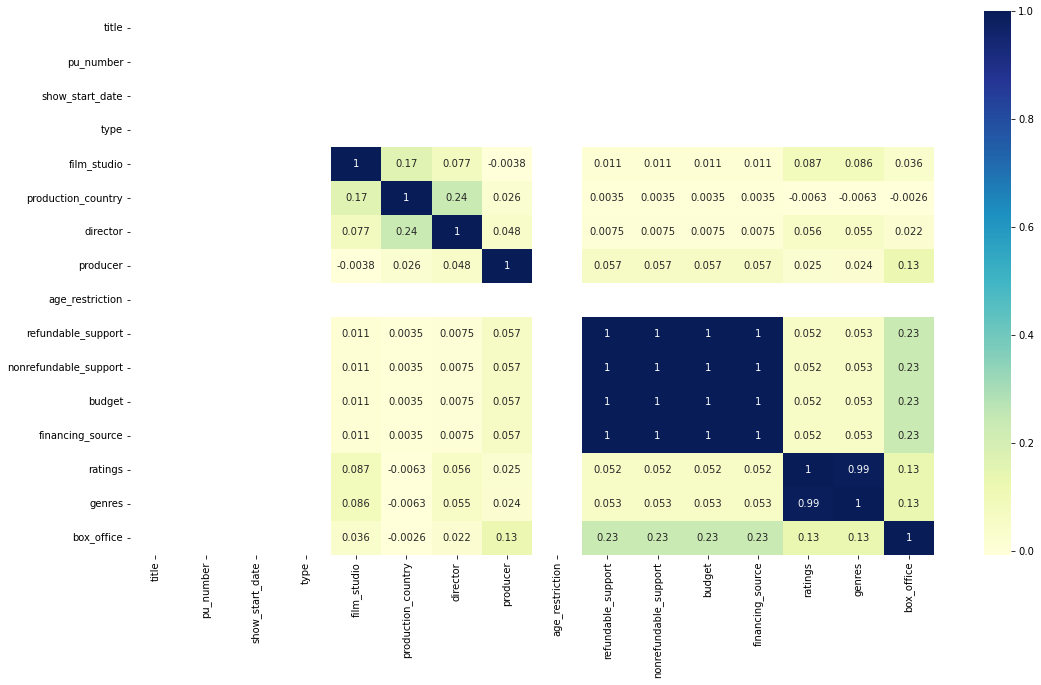

In [21]:
# строим тепловую карту корреляции по пропускам в df
fig,ax = plt.subplots(figsize=(18,10))
sns.heatmap(df.isna().corr(),cmap='YlGnBu',annot=True)
plt.show()

Видно, что пропусков много. Удалить мы можем не более 10% из изначального кол-ва 7486 - 749 строк. И одну мы уже удалили.

К тому же надо помнить, что не все столбцы влияют на ход исследования.

Больше всего пропусков (по 96%) в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`. Мы знаем, что в этих столбцах информация о государственной поддержке. Известно, что поддержка была не у всех фильмов. Отсюда и пропуски. К тому же, по тепловой карте корреляции пропусков видно, что строки с пропусками в этих колонках совпадают полностью. Оставим пропуски в стоблцах с господдержкой без изменений.

Следом (58%) `box_office` - сборы в рублях. Пропусков много и они возникли при слиянии. В одном датасете на момент слияния было 7485 строк, а в другом 3158. Ненайденные ячейки заполнились пропусками - о показах в кинотеатрах этих фильмов нам ничего не известно. Заполнять их точно нечем, т.к. не на все прокатные удостоверения изначальна выдана информаци по сборам.

В колонках `ratings` и `genre` по 13% пропусков, число строк немного различаются, по тепловой карте пропуски в этих колонках совпадают на 99%. Отсустсвие рейтинга можно объяснить нулевым (ранее выяснили, что нулевых значений в заполненных ячейках нет), а вот отстуствие жанра выглядит странно. Но нам известно, что на один фильм может быть несколько прокатных удостоверений. Проверим, пересекаются ли названия фильмов в заполненных и незаполнненных строках в этой колоке. Возможно, сможем заполнить пропуски на их основе.

Пропуски в данных о продюссерах `producer` (8%) - можно предположить, что фильмы производились там, где продюссеров не было. Например, СССР. Это видно из первых 10-ти строчек датасета. Проверим, в каких странах были сняты фильмы без продюссеров.

Меньше процента пропусков в колонках `film_studio`, `director` и `production_country`. Т.к. процент небольшой, можно было бы удалить эти данные после промостра этих строк. Но колонки `film_studio` и `production_country` не участвуют в исследовании, а  `director` с пропусками оставлять нельзя.

Со всеми колонками будем работать. Нужно будет:

- проверить, могли ли эти значения быть пустыми или необходимо заполнение. 
- заполнить пропуски подходящими значениями при необходимости. 
- оценить, насколько заполнение/удаление повредят расчётам.

Но сначала, посмотрим, сколько явных дубликатов в наших данных:

In [22]:
# считаем кол-во явных дубликатов
df.duplicated().sum()

0

Явных дубликатов нет, посмотрим на пропуски в данных. Начнем со столбцов с минимальными пропусками: `film_studio`, `director` и `production_country`.

In [23]:
# фильтруем пропуски в film_studio, director и production_country
display(df.loc[(df['film_studio'].isna())|(df['director'].isna())|(df['production_country'].isna())]
        .sort_values(by=['title']))
len(df.loc[(df['film_studio'].isna())|(df['director'].isna())|(df['production_country'].isna())])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
6638,Брови,111000719,2019-03-01 12:00:00+00:00,Художественный,NaN,Россия,О.Штром,"В.Максимов, В.Степанов, Г.Киракосян, О.Штром",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,В плену города грёз,112014818,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,В.Витовцев,О.Мичи,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.90,"фантастика,боевик,триллер",NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
6484,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6398,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6104,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN


27

Пропусков не так много, 27 (0,36% от общего кол-ва данных)

Из документации к данным мы помним, что у одного фильма может быть не одно прокатное удостоверение, а несколько. Следовательно, некоторые строчки могут различаться только номером прокатного удостоверения. А возможно также, что в одном случае у фильма есть данные о режиссере, студии или стране, а с другим прокатным удостоверением у этого же фильма данные пропущены.

Но названия у фильмов могут быть не уникальны: экранизация книги разными режиссерами, ремейки и просто совпадения могут дать одинаковое название у двух разных фильмов. А вот два одинаковых фильма у одного режиссера скорее быть не может.

Проверим эту версию.

<div class="alert alert-danger">
<b>ВАЖНОЕ УТОЧНЕНИЕ:</b> Для того, чтобы считать уникальные названия фильмов, нам необходимо быть уверенными, что неявных дубликатов в названиях и в именах режиссеров нет. Проверить все названия и все имена режиссеров в данном учебном проекте на этом этапе обучения возможности, знаний и инструментов для работы с текстовыми дубликатами, к сожалению, нет. Поэтому, в рамках учебного проекта допускаем, что все значения в этих столбцах без неявных дубликатов. В рабочем проекте проверка была бы проведена. </div>

In [24]:
# считаем дубликаты по совпадениям только в названиях и в названиях и режиссере
print('Совпадений по названию', df[['title']].duplicated().sum(), '\n',
     'Совпадений по названию и режиссеру', df[['title','director']].duplicated().sum())


Совпадений по названию 714 
 Совпадений по названию и режиссеру 683


Предположение подтвердилось. Совпадений только по названию больше. В базе 6802 уникальных фильма на 7485 прокатов. 9% прокатов не уникальны.

Будем искать пересечения по двум колонкам. 

In [25]:
# создаем функцию, которая возвращает датафрейм с дубликатами названий и без пропусков в заданном столбце

def find_isna(colomn):
    """
    Функция возвращает которая возвращает датафрейм 
    с дубликатами названий и режиссеров и без пропусков в заданном столбце
    
    """

    
    # создадим датасет dfe и поместим туда строчки из df с пропусками
    dfe=df.loc[(df[colomn].isna())]
    
    # посчитаем кол-во пропусков
    print ('Пропусков в df в колонке ', colomn, len(dfe))
    
    # оставим в dfe 3 столбца title, director и с искомыми пропусками
    dfe=dfe[['title','director',colomn]]
    
    # уберем явные дубликаты в dfe
    dfe=dfe.drop_duplicates()
    
    # соберем в dfe строки из df с совпадающими названиями фильмов и режиссеру
    dfe=dfe.merge(df[['title','director',colomn]],on=['title','director'], how='left')
    
    # сделаем переменную для столбеца с новыми данными
    col=colomn+'_y'
    
    # отфильтруем отсуствие пропусков в выбранном столбце
    display(dfe.loc[(dfe[col].isna()==False)].sort_values(by=['title']))
    
    # посчитаем кол-во строк в dfe
    
    return print('После соединения кол-во строк стало ', len(dfe))

In [26]:
# выделяем дубликаты строк с пропусками в production_country
find_isna('production_country')

Пропусков в df в колонке  production_country 2


,title,director,production_country_x,production_country_y


После соединения кол-во строк стало  2


In [27]:
# выделяем дубликаты строк с пропусками в film_studio
find_isna('film_studio')

Пропусков в df в колонке  film_studio 18


,title,director,film_studio_x,film_studio_y


После соединения кол-во строк стало  18


Проверить версию для колонки с режиссерами в этой функции не получится. Проверим совпадения только по названиям фильмов вручную.

In [28]:
# создадим датасет dfe и поместим туда строчки из df с пропусками
dfe=df.loc[(df['director'].isna())]
    
# посчитаем кол-во пропусков
print ('Пропусков в df в колонке ', 'director', len(dfe))
    
# оставим в dfe 2 столбца title и director
dfe=dfe[['title','director']]
    
# уберем явные дубликаты в dfe
dfe=dfe.drop_duplicates()
    
# соберем в dfe строки из df с совпадающими названиями фильмов и режиссеру
dfe=dfe.merge(df[['title','director']],on=['title'], how='left')
    
# отфильтруем отсуствие пропусков в выбранном столбце
display(dfe.loc[(dfe['director_y'].isna()==False)].sort_values(by=['title']))
    
# посчитаем кол-во строк в dfe
print('После соединения кол-во строк стало ', len(dfe))

Пропусков в df в колонке  director 9


,title,director_x,director_y


После соединения кол-во строк стало  9


Дубликатов с заполненным ячейками по колонкам `film_studio0`, `director` и `production_country` не обнаружено.

Откуда появились эти пропуски? Известно, что данные получили из Кинопоиска. Если проверить на этом сайте выборочно пару фильмов, то видно, что данные про студию на сайте есть: https://www.kinopoisk.ru/film/732415/studio/ https://www.kinopoisk.ru/film/487219/studio/

А вот режиссер действительно может быть не указан https://www.kinopoisk.ru/film/799247/, https://www.kinopoisk.ru/film/573207/, а где-то режиссер не попал в базу по ошибке https://www.kinopoisk.ru/film/638898/. И нельзя сказать, что это зависит от жанра фильма или от чего-то еще.

Некоторых фильмов на Кинопоиске сейчас совсем нет. Например: "Зур концерт (Большой концерт).", "Изге Вэли (Святой Валентин)" и пр. Возможно правообладатели отозвали разрешение на эти фильмы и восстановить данные по этим фильмам с Кинопоиска нельзя.

Со страной выпуска, в принципе, все понятно. Страна не указана у двух фильмов: "Ералаш" и "Мульт Личности". Первый мог быть произведен еще в СССР, но ООО "Продюсерский центр ЕРАЛАШ" указывает нам на то, что это уже Россия. Про второй информация с Кинопоиска https://www.kinopoisk.ru/series/487219/ - тоже Россия. Эти пропуски можно было бы заполнить. Но В "Мульт Личности" не указан ни режиссер, ни студия.

В идеале, в рабочем проекте было бы хорошо запросить новый сбор информации с Кинопоиска или самостоятельно спарсить информацию с Кинопоиска и заполнить пропуски. Но это учебный проект, самостоятельно собирать информацию с сайтов мы пока не умеем, А вручную заполнять каждую ячейку не имеет смысла.

Столбцы  `film_studio` и `production_country` не участвуют в исследовании - оставим пропуски. 

А  `director` с пропусками оставлять нельзя. Посмотрим, есть ли в этих строках ценная для нас информация. 

In [30]:
# отфильтруем пропуски в director
df.loc[(df['director'].isna())].sort_values(by=['title'])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"


9 строк, информации о господдержке нет, рейтинг и жанр у 3-х, сборы у 1-го. Эти строки можно удалить. (0,1% от общего числа)

In [31]:
#удаляем данные с пропусками в director
df=df.dropna(subset=['director'])
# 
df['director'].isna().sum()

0

Посмотрим на пропуски в колонке `producer`. В каких странах были выпущены эти фильмы?

In [32]:
# Подсчёт количества фильмов по стране выпуска с пропусками в графе продюссер
df[df['producer'].isna()]['production_country'].value_counts()

СССР                                              342
Россия                                             34
Великобритания                                     33
США                                                24
СССР                                               20
                                                 ... 
Бельгия - Испания - Канада - Нидерланды             1
 СССР                                               1
СССР                                                1
 СССР                                               1
Польша - Франция - Испания - Бразилия - Швеция      1
Name: production_country, Length: 70, dtype: int64

Фильмы из 70 стран (учитывая международные проекты) с пропусками в графе продюссер. Из 568 - 342 в СССР, где продюссеры отсутствовали как класс. Еще сразу видны неявные дубликаты в названиях стран. Посмотрим на уникальные значения в колонке `producer`.

In [33]:
df.sort_values(by='production_country')['production_country'].unique()

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия

На исследование колонка `production_country` не влияет, но для отработки учебного процесса удалим видимые неявные дубликаты в этой колонке:
* CША - США - СЩА
* Беларусь - Белоруссия
* Бельгия - Бенльгия
* Босния-Герцеговина - Босния и Герцеговина
* Германия - Германя
* Израиль - Изриль
* К;анада - Канада
* Н.Зеландия - Новая Зеландия
* Норвегия - Норвения
* ОАЭ - Объединенные Арабские Эмираты
* Порртугалия - Португалия
* Пуэрто-Рико - Пуэрто Рико
* Франция - Фрация
* Ю.Корея - Южная Корея

Удалим слово "Республика" для дублирующих названий:
* Республика Армения
* Республика Белоруссия
* Республика Казахстан
* Республика Кипр
* Республика Корея

и удалим лишние пробелы.

In [34]:
# посчитаем уникальные значения в production_country до замены
print('до замены', len(set(df['production_country'])))
# удаляем лишние пробелы
df['production_country'] = df['production_country'].replace(to_replace=[r' +$',r'^ +'], value=r'', regex=True)
# удаляем слово Республика
df['production_country'] = df['production_country'].str.replace('Республика ','')
# заменяем названия стран
df['production_country'] = df['production_country'].replace(to_replace=[r'CША',r'СЩА'], value=r'США', regex=True)
df=df.replace(regex={'Беларусь':'Белоруссия', 'Бенльгия':'Бельгия',
               'Босния-Герцеговина':'Босния и Герцеговина','Германя':'Германия',
               'Изриль':'Израиль', 'К;анада':'Канада', 'Н.Зеландия':'Новая Зеландия',
               'Норвения':'Норвегия', 'Объединенные Арабские Эмираты':'ОАЭ',
               'Порртугалия':'Португалия','Пуэрто-Рико':'Пуэрто Рико',
               'Фрация':'Франция','Ю.Корея':'Южная Корея'})
# посчитаем уникальные значения в production_country после замены
print('после замены',len(set(df['production_country'])))
# смотрим уникальные значения locality_name
df['production_country'].unique()

до замены 951
после замены 926


array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

Самые заметные опечатки и дубликаты удалены.

Посмотрим, еще раз на страны фильмов без продюссера.

In [35]:
# Подсчёт количества фильмов по стране выпуска с пропусками в графе продюссер
df[df['producer'].isna()]['production_country'].value_counts()

СССР                                                                    372
Россия                                                                   34
Великобритания                                                           33
США                                                                      24
Италия                                                                   17
                                                                       ... 
США - Великобритания - Германия - Новая Зеландия - Бельгия - Франция      1
Бельгия - Испания - Канада - Нидерланды                                   1
СССР, Венгрия, ЧССР, ГДР                                                  1
Индия - Мексика                                                           1
Польша - Франция - Испания - Бразилия - Швеция                            1
Name: production_country, Length: 61, dtype: int64

Теперь из 568 - 372 СССР (65%). Осталось 35% пропусков. Немного помогла бы информация по дате выпуска фильма: чем старше фильм, тем меньше вероятность наличия продюссера. Но таких данных нет. Кроме того, имеют место быть технические ошибки. Например, фильм "Эверли" https://www.kinopoisk.ru/film/608066/ продюссер на Кинопоиске указан, а в датасете пропуск.

Восстановить данные в колонке `producer` возможности нет, на исследование эта колонка не влияет, оставим пропуски как есть.

Следующими рассмотрим пропуски в колонке `ratings`. Их 966, что составляет 13% из общего числа. Эта колонка влияет на исследование. Проверим дубликаты фильмов по названию и режиссеру.

In [36]:
# выделяем дубликаты строк с пропусками в ratings
find_isna('ratings')

Пропусков в df в колонке  ratings 960


,title,director,ratings_x,ratings_y


После соединения кол-во строк стало  960


Пересечений по фильмам нет. Возможно, это фильмы вышедшие перед самой выгрузкой данных и рейтинг они еще не успели получить. Посмотрим на даты премьер фильмов с пропусками в рейтинге. (Хотя, дата выхода фильма была бы информативнее)

3791   2010-01-15 12:00:00+00:00
3795   2010-01-18 12:00:00+00:00
4342   2010-01-25 12:00:00+00:00
3789   2010-01-25 12:00:00+00:00
4321   2010-01-27 12:00:00+00:00
                  ...           
7480   2019-12-23 12:00:00+00:00
7478   2019-12-26 12:00:00+00:00
7466   2019-12-27 12:00:00+00:00
7482   2019-12-28 12:00:00+00:00
7483   2019-12-30 12:00:00+00:00
Name: show_start_date, Length: 960, dtype: datetime64[ns, UTC]

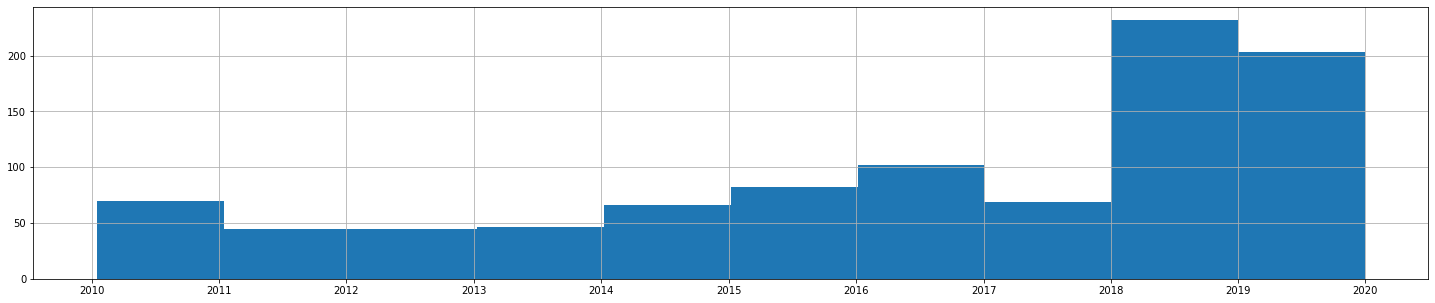

In [38]:
# сортируем данные в show_start_date, отфильтровав пропуски в ratings
display(df[df['ratings'].isna()]['show_start_date'].sort_values())

# построим гистрограмму по фильмам с пропусками в ratings
df[df['ratings'].isna()]['show_start_date'].hist(bins=10, figsize=(25,5));

4455   2010-01-11 12:00:00+00:00
4331   2010-01-13 12:00:00+00:00
4465   2010-01-13 12:00:00+00:00
4334   2010-01-14 12:00:00+00:00
4333   2010-01-14 12:00:00+00:00
                  ...           
7478   2019-12-26 12:00:00+00:00
7466   2019-12-27 12:00:00+00:00
7482   2019-12-28 12:00:00+00:00
7483   2019-12-30 12:00:00+00:00
7484   2019-12-30 12:00:00+00:00
Name: show_start_date, Length: 7476, dtype: datetime64[ns, UTC]

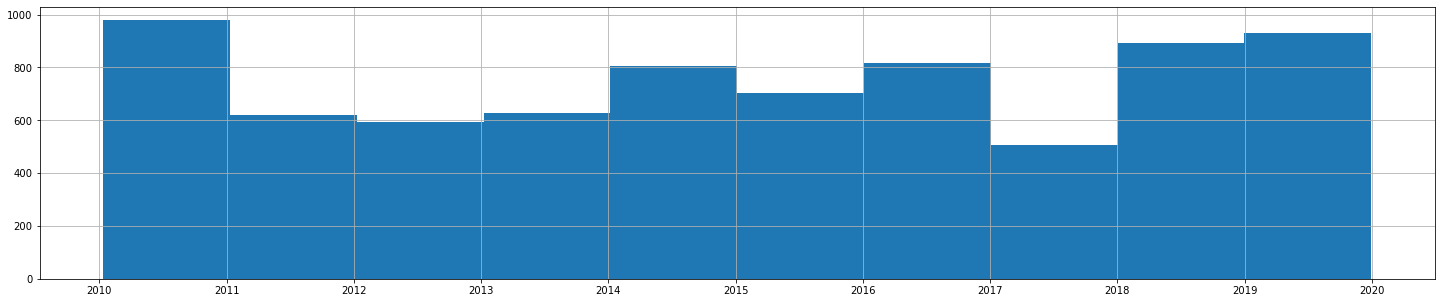

In [40]:
# сортируем данные в show_start_date
display(df['show_start_date'].sort_values())

# построим гистрограмму по датам премьер всех фильмов в df
df['show_start_date'].hist(bins=10, figsize=(25,5));

Если сравнить даты премьер по всей базе и по пропускам в рейтинге, то можно заметить:
* минимальные и максимальные даты почти совпадают (январь 2010 - декабрь 2019)
* без рейтинга большинство фильмов приходятся на 2018 и 2019 годы, а по общей базе такого большого перепада нет.

Посмотрим выборочно на фильмы 2010 года без рейтинга.

In [41]:
# фильтруем пропуски в ratings по 2010 году
display(df.loc[(df['ratings'].isna())&(df['show_start_date']<'2011')].sort_values(by=['show_start_date']))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3791,"Лучшие музыкальные пародии (""ОСП - избранное"")",217000510,2010-01-15 12:00:00+00:00,Художественный,"ООО ""О.С.П.""",Россия,А.Грабарь,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3795,"КОЗЬЯ ХАТКА (проект ""Гора самоцветов"")",114000110,2010-01-18 12:00:00+00:00,Анимационный,"ООО ""Анимационная студия Пилот Александра Тата...",Россия,Э.Назаров,И.Гелашвили,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3789,"Легион_.(Фильм содержит сцены ужасов, насилия ...",121000310,2010-01-25 12:00:00+00:00,Художественный,Болд Филмз,США,Скотт Стюарт,"Дэвид Ланкастер, Майкл Литвак",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,560.00
4342,72 метра (3 серии),211003110,2010-01-25 12:00:00+00:00,Художественный,"ООО ""Студия ТРИТЭ"" по заказу ОАО ""Первый канал""",Россия,В.Хотиненко,"А.Максимов, К.Эрнст, Л.Верещагин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4321,Однажды в Риме,121001410,2010-01-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Краснофф Фостер Продакшнз",США,Марк Стивен Джонсон,"Рикки Ли Бисталл, Марк Стивен Джонсон, Эндрю П...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,"Александр Буйнов ""Юбилейный концерт в Кремле. ...",217044710,2010-12-15 12:00:00+00:00,Художественный,Студия Елены Буйновой,Россия,А.Шадров,Е.Буйнова,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4630,Парфюмер: История одного убийцы (по роману Пат...,221153310,2010-12-17 12:00:00+00:00,Художественный,"Константин Филм, ВИР 4 Медиенфондс, Нувель Еди...",Франция-Испания-Германия,Том Тыквер,"Эндрю Биркин, Бернд Эйхенгер, Мартин Московиц",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4736,Винченцо Беллини. Норма /По произведению Алекс...,126002010,2010-12-23 12:00:00+00:00,Прочие,Р А И Синема,Италия,Федерико Тицци,Комунале,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4737,Вольфганг Амадей Моцарт. Так поступают все жен...,126002110,2010-12-23 12:00:00+00:00,Прочие,Опус Арте,Великобритания,Джонатан Миллер,Ковент-Гарден,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


https://www.kinopoisk.ru/film/78378/ - фильм "Парфюмер", рейтинг есть на Кинопоиске, в базе нет. И очень сомнительно, что для фильма 2007 года выпуска к концу 2019 не был известен рейтинг.

https://www.kinopoisk.ru/film/406366/ - "Однажды в Риме" - аналогичная история.

Заполнить нулями эти пропуски нельзя. Искать рейтинг на каждый фильм вручную тоже нереально. Заполнить эти пропуски на основе известных рейтингов недопустимо: каждый фильм это отдельное произведение и его рейтинг на зависит от жанра, страны выпуска и пр.

Колонка `genres` - 975 пропусков (13%). Посмотрим на 10 случайных строк с пропусками в жанре. Известно, что на 99% эти строки совпадают с пропупусками в колонке `ratings`.

In [42]:
# получение случайных 10 строк таблицы df
df[df['genres'].isna()].sample(10, random_state=42)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5979,ПОДЗЕМНЫЕ ДВОРЦЫ ДЛЯ ВОЖДЯ И СИНИЦЫ,112001618,2018-07-02 12:00:00+00:00,Документальный,"ООО ""СТУДИЯ Н+Н""",Россия,С.Ермоленко,Н.Виноградова,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2986,МУЛЬТ в кино. Выпуск № 30,114001316,2016-04-27 12:00:00+00:00,Анимационный,"ООО ""Паровоз"", ООО ""Анимационная студия ""МУ"", ...",Россия,"Н.Мубинов, А.Чернова, С.Горя, А.Черногоров и др.","Д.Медников, Т.Цыварева, В.Воля, Е.Головин, А.С...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"2,955,934.60"
3978,"1937. Время смерти (""Судоходное кладбище"", ""Тр...",212035010,2010-09-03 12:00:00+00:00,Художественный,"ООО Киностудия ""Гамаюн""",Россия,"Д.Мастеров, Н.Попова",NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5412,Гоголь. Начало. Гоголь. Заколдованное место. Г...,111005217,2017-07-25 12:00:00+00:00,Художественный,"АО ""ТНТ-Телесеть"", ООО ""Продюсерская компания ...",Россия,Е.Баранов,"Е.Никишов, В.Федорович, А.Цекало, ООО ""Ника ТВ""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,Нуреев и друзья,126001014,2014-03-28 12:00:00+00:00,Прочие,"Аполло Диджитал Интертейнмент, Э Блинк Ти Ви, ...",Великобритания,Маркус Винер,"Тофикье Али, Кэтрин Винер, Том Колборн, Билл Лорд",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7181,Щенячий патруль: Суперпатруль 2,124006519,2019-08-20 12:00:00+00:00,Анимационный,"Спин Мастер, Виаком",Канада - США,Чарльз Е.Бастьен,"Дэмиан Темпорале, Кит Чэпман",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6633,Марш Прощание Славянки. Детектив в миноре,112025418,2019-01-29 12:00:00+00:00,Документальный,"ООО ""Компания ""АТК-СТУДИО""",Россия,Е.Дорофеева,А.Тютрюмов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5323,Выбор капитана Корелли (по книге Луиса де Берн...,221085110,2010-08-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Студио Канал, Мирамакс Филм...",США-Италия-Греция,Джон Мэдден,Кевин Лоудер,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1517,Средняя школа,121028213,2013-11-07 12:00:00+00:00,Художественный,Пеликан Хауз Продакшнз,США,Том Моррис,"Джаз Калкат, Кевин Лианг, Эллиот Фельд",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5815,Невероятные приключения Нильса,214003818,2018-04-16 12:00:00+00:00,Анимационный,"ООО ""АА студио""",Россия,А.Котёночкин,"А.Митрошенков, Н.Гюзалян, А.Ованнисян",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Никаких закономерностей не видно. Посмотрим в каких типах фильмов чаще всего пропущены жанры.

In [43]:
# Подсчёт количества фильмов по стране выпуска с пропусками в графе продюссер
df[df['genres'].isna()]['type'].value_counts()

Анимационный         258
Художественный       214
Прочие               195
 Художественный      158
Документальный       126
Научно-популярный     18
Name: type, dtype: int64

Даже с учетом дубликата типе "Художественный" никакой ососбенной закономерности не видим.

Случайный фильм из подборки "Роковое SMS" - https://www.kinopoisk.ru/film/1221593/ На Кинопоиске жанр указан, а в базе жанра нет.
Такая же картина с фильмом "В поисках Евы" https://www.kinopoisk.ru/film/1237977/.

Стоит отметить, что рейтинга у этих двух фильмов нет ни на Кинопоиске, ни в базе.

Итак, по двум колонкам `ratings` и `genres` известно:
* пропуски совпадают на 99%
* всего 13% пропусков
* пропуски в рейтинге могут быть из-за того, что рейтинга еще нет (не было на момент выгрузки базы)
* также пропуски в рейтинге и в жанре не имеют видимых закономерностей от других данных.
* больше всего пропусков в этих колонках приходятся на 2018 и 2019 год.
* пропуски по жанру можно было бы заполнить дополнительной выгрузкой данных с Кинопоиска и, возможно, по рейтингу.

Заполнить пропуски данным мы не можем, для удаления это будет слишком большой объем.

В колонке `ratings` данные типа `float` и тут пропуски не будут мешать дальнейшиму исследованию. Оставляем эти пропуски.

А в колонке `genres` текстовые данные. И в дальнейшем пропуски будут мешать. Заполним эти пропуски значением `unknown`

In [44]:
# заменяем пропуски в колонке genres значением unknown
df['genres']=df['genres'].fillna('unknown')
# проверяем заполнение
df['genres'].isna().sum()

0

По итогу: почти все пропуски в данных учебного проекта игнорируем, кроме стобцов `genres` и `director` (они понадобятся в дальнейшем исследовании без пропусков)

Но в рабочем проекте запросили бы восстановление данных с сайта Кинопоиска.

#### Изучим дубликаты в датафрейме

В базе есть категориальные стобцы:
* `title` — название фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `show_start_date` — дата премьеры фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма
* `pu_number` — номер прокатного удостоверения;
* `financing_source` — источник государственного финансирования;

и количественные:
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `budget` — общий бюджет фильма;
* `box_office` — сборы в рублях.

В подпункте выше уже выяснили, что явных дубликатов не обнаружено и устранили видимые неявные дубликаты в столбце `production_country` и `ratings` на этапе изменения типа данных. С датами проблем с неявными дубликатами быть не должно: изменение типа данных прошло успешно. Значения колонки просмотрены на этапе изучения пропусков в рейтингах. Выбросов и аномальных значений не выявлено. Также заметили неявные дубликаты в стобце `type`.

Посмотрим отдельно на категориальные и количественные данные:
* проверим, есть ли в данных дубликаты.
* опишем причины, которые могли повлиять на появление дублей.
* проверим, есть ли аномалии и выбросы.

##### Изучаем категориальные значения

Начнем со столбца, где уже выявлены неявные дубликаты - `type`. Посмотрим на уникальные значения из этого столбца.

In [45]:
# смотрим уникальные значения type
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Есть лишние пробелы в начале строки у типа "Художественный" и "Анимационный". Удалим их.

In [46]:
# удаляем лишние пробелы в начале строки в колонке type
df['type']=df['type'].str.strip()
# проверяем удаление
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Тут исправили. Посмотрим на источники финансирования.

In [47]:
# смотрим уникальные значения financing_source
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

В источниках финансирования уникальных значений не много и ошибок не выявлено.

Искать неявные дубликаты в названиях фильмов, студиях, жанрах, режиссерах и продюссерах, сравнивая каждую строчку в данном учебном проекте не будем: названий очень много, интрументов для работы с текстом в нашем арсенале пока нет, на ход исследования эти дубликаты, если они и есть, сильно повлиять не должны. Но, посмотрим на уникальные значения каждого из этих столбцов.

In [48]:
# смотрим уникальные значения film_studio
df['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [49]:
# смотрим уникальные значения title
df['title'].unique()

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

In [50]:
# смотрим уникальные значения genres
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'unknown', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комед

In [51]:
# смотрим уникальные значения director
df['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [52]:
# смотрим уникальные значения producer
df['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

Из пяти колонок у одной `film_studio` видны лишние пробелы. Не исключено, что такие ошибки могут встречаться во всех текстовых значениях. Причем, на примере со странами, видно, что лишние пробелы могут быть не только в начале и в конце строки, но и в середине. Откуда эти пробелы могли возникнуть: при слиянии нескольких данных, при опечатке, если данные вводились вручную.

Удалим все лишние пробелы в базе.

In [53]:
# удаляем лишние пробелы
df = df.replace(to_replace=[r' +$',r'^ +'], value=r'', regex=True)
# проверим удаление на примере film_studio
df['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

В предыдущем шаге мы уже считали совпадения по названиям и режиссерам. Проверим, изменилась ли картина после удаления пробелов.

In [54]:
# считаем дубликаты по совпадениям только в названиях и в названиях и режиссере
print('Совпадений по названию', df[['title']].duplicated().sum(), '\n',
     'Совпадений по названию и режиссеру', df[['title','director']].duplicated().sum())

Совпадений по названию 714 
 Совпадений по названию и режиссеру 683


Кол-во совпадений не изменилось. Значит, лишние пробелы если и были в значениях этих колонок, на дубликаты они не повлияли.

Посмотрим на уникальные значения в возрастных ограничениях

In [55]:
# смотрим уникальные значения age_restriction
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Тут нет проблем, осталась последняя колонка: номер прокатного удостоверения. Известно, что на один фильм может быть несколько прокатных удостоверений. Но не может быть у двух фильмов одинакового номера удостоверения. Посмотрим, все ли номера уникальны. 

In [56]:
# Подсчёт количества значений в pu_number в df
df['pu_number'].value_counts()

221054410    2
221154310    2
221048915    1
221049511    1
121021611    1
            ..
121009015    1
111004115    1
211047015    1
121011015    1
124010719    1
Name: pu_number, Length: 7474, dtype: int64

Два номера прокатных удостоверений встречаются по 2 раза. Это или дубликаты, или ошибка. Посмотрим, что это за фильмы.

In [57]:
# в df отфильтровываем строчки со значением 221054410 и 221154310  в колонке pu_number
df.query('pu_number==221054410 or pu_number==221154310')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Ф...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


С номером 221054410 ошибка кажется логичной: названия фильмов очень похожи. Это или человеческий фактор или техническая ошибка. А 221154310 скорее всего техническая ошибка. Причем видно, что даты у этих двух пар совпадают между собой. Найти истинный номер прокатного удостоверения для каждого из четырех фильмов не представляется возможным. У этих фильмов нет финансовой информации. Удалим эти строчки. (0,05% от общего числа)

In [58]:
# в df удалим строчки со значением 221054410 и 221154310  в колонке pu_number
df=df.query('pu_number!=221054410 and pu_number!=221154310')
# проверяем удаление
df['pu_number'].value_counts()

221048915    1
221049411    1
111009311    1
121021611    1
121015411    1
            ..
111004115    1
211047015    1
121011015    1
111005015    1
124010719    1
Name: pu_number, Length: 7472, dtype: int64

##### Проверьте количественные значения

Колличественных колонок не так много: сборы, бюджет и гос поддержка. Посмотрим на каждый подробнее.

* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `budget` — общий бюджет фильма;
* `box_office` — сборы в рублях.


In [74]:
# создаем функцию для просмотра колонок на предмет аномалий

def describe_hist_boxplot(column, bins=200):
    """
    Функция возвращает информацию о колонке:
    - описательную статистику
    - гистограмма
    - диаграмму размаха
    
    """

    # построим гистрограмму
    df[column].hist(bins=bins, figsize=(25,10))
    plt.show()
    # отобразим описательную статистику
    display(df[column].describe())
    # строим диаграмму размаха
    df.boxplot([column], figsize=(5,10))


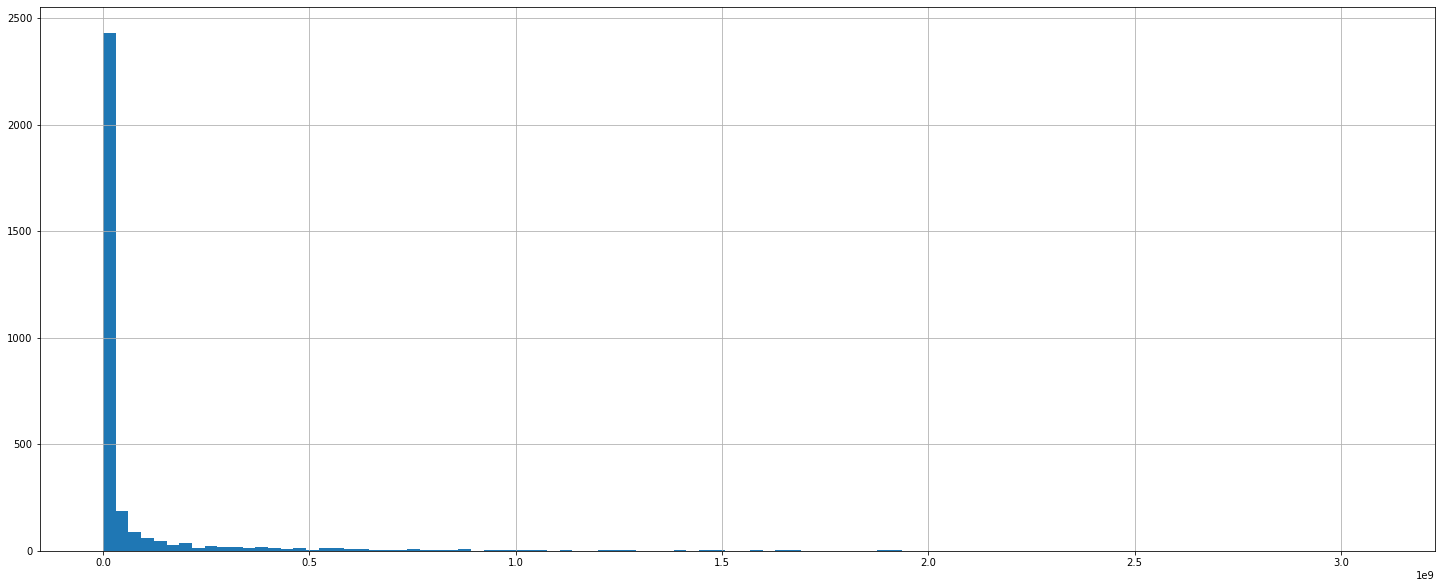

count           3,157.00
mean       76,502,907.23
std       240,387,347.04
min                 0.00
25%            86,386.00
50%         2,330,104.00
75%        23,983,117.70
max     3,073,568,690.79
Name: box_office, dtype: float64

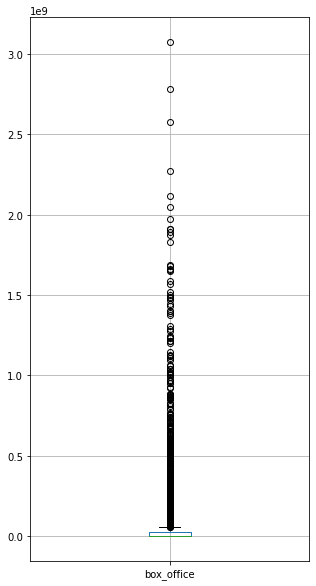

In [75]:
# смотрим статистику и графики по колонке box_office
describe_hist_boxplot('box_office', bins=100)

Разброс от 0 до 3 млрд. Среднее на 76,5 млн, а медиана 2,3 млн. По гистограмме виден большой пик у нуля и единичные значения после 2 млрд. С учетом того, что медиана у 2-х млн, пик у нуля (больше 2-х тыс значений), как раз приходится на первую половину данных. Разделим данные на участки для удобства просмотра.

до 10тр


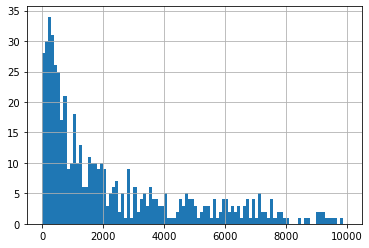

от 10тр до 100тр


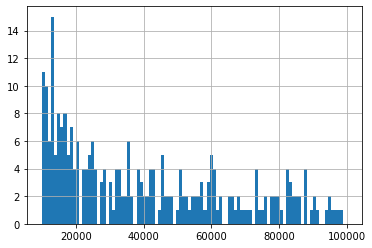

от 100тр до 10млн


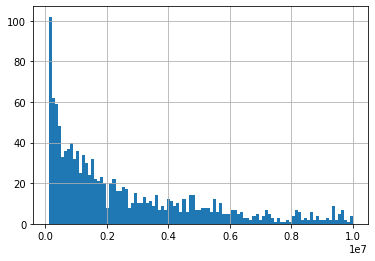

от 10млн до 200млн


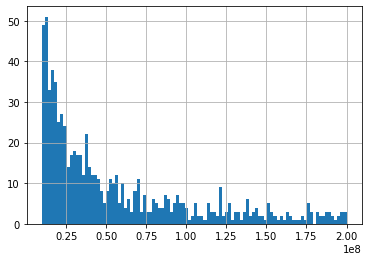

от 200млн до 3,1 млрд


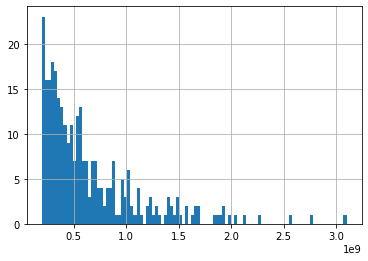

In [80]:
# построим гистрограмму по значения box_office
# до 10тр
print('до 10тр')
df['box_office'].hist(bins=100, range=(0,10000))
plt.show()
# от 10тр до 100тр
print('от 10тр до 100тр')
df['box_office'].hist(bins=100, range=(10000,100000))
plt.show()
# от 100тр до 10млн
print('от 100тр до 10млн')
df['box_office'].hist(bins=100, range=(100000,10000000))
plt.show()
# от 10млн до 200млн
print('от 10млн до 200млн')
df['box_office'].hist(bins=100, range=(10000000,200000000))
plt.show()
# от 200млн до 3,1 млрд
print('от 200млн до 3,1 млрд')
df['box_office'].hist(bins=100, range=(200000000,3100000000))
plt.show()

На 5 участках гистрограмм видно относительно плавное снижение кол-ва успешных по сборам фильмов. Надо понимать, что плавность обусловлена тем, что разброс по сумме сбора у первых графиков сильно меньше, чем у последнних. Но сильных разрывов, дополнительных пиков, скопления прямо на нуле не видно.

Нельзя также назвать какие-то значения аномальными, потому что у нас нет информации:
 - сборы были за показы в большой сети кинотеатров или в одном отдаленном.
 - какой это был прокат: мировая премьера или ретроспектива.
 - это был физический кинотеатр или онлайн.
 - какая дата выхода фильма
 
Посмотрим, какие фильмы собрали больше 1млрд и меньше 3тр.

In [81]:
# отфильтруем значения больше 1млрд в box_office
df.query('box_office>1000000000').sort_values(by=['box_office'])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2510,Монстры на каникулах 2,124003615,2015-10-15 12:00:00+00:00,Анимационный,"Коламбиа Пикчерз, ЭлСтар Кэпитал, Сони Пикчерз...",США,Геннадий Тартаковский,"Аллен Коверт, Мишель Мердокка",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.20,"мультфильм,фэнтези,комедия","1,000,157,204.40"
3171,Выживший (2015),121026215,2015-12-30 12:00:00+00:00,Художественный,"Нью Ридженси Пикчерз, Анонимус Контент, Аппиан...",США,Алехандро Гонсалес Иньярриту,"Стив Голин, Алехандро Гонсалес Иньярриту, Дэви...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.80,"приключения,вестерн,боевик","1,006,737,153.00"
1981,Седьмой сын,121026614,2014-11-11 12:00:00+00:00,Художественный,"Леджендари Пикчерз, Мовинг Пикчерз Компани, Ут...",США - Великобритания - Канада - КНР,Сергей Бодров,"Бэзил Иваник, Томас Тулл, Лайонел Уигрэм",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.80,"фэнтези,приключения","1,016,410,635.30"
6339,Богемская рапсодия,121024118,2018-10-26 12:00:00+00:00,Художественный,"Нью Ридженси Пикчерз, Ридженси Интертейнмент, ...",США - Великобритания,Брайан Сингер,"Джим Бич, Грэм Кинг, Роберт Де Ниро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"биография,музыка,драма","1,019,186,336.23"
3001,Иллюзия обмана 2,121012016,2016-05-17 12:00:00+00:00,Художественный,"Лайонсгейт, Саммит Интертейнмент",США,Джон М.Чу,"Бобби Коэн, Алекс Куртцман, Роберто Орси",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.60,"боевик,триллер,комедия","1,021,426,122.00"
5472,Оно,121017617,2017-09-07 12:00:00+00:00,Художественный,"Нью Лайн Синема, КатзСмит Продакшнз, Лин Пикче...",США,Андрес Мускетти,"Сэт Грэм-Смит, Рой Ли, Дэн Лин",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.30,"ужасы,фэнтези,драма","1,036,725,434.00"
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"
7387,Полицейский с Рублевки. Новогодний Беспредел 2,111019519,2019-12-12 12:00:00+00:00,Художественный,"АО ""ТНТ-Телесеть"", ООО ""ЛЕГИО ФЕЛИКС"", ООО ""1-...",Россия,И.Куликов,"В.Федорович, Е.Никишов, И.Куликов, ООО ""1-2-3 ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.80,"комедия,приключения","1,039,706,431.83"
2508,Терминатор: Генезис,121012415,2015-06-11 12:00:00+00:00,Художественный,"Парамаунт Пикчерз, Скайдэнс Продакшнз",США,Алан Тэйлор,"Дэвид Эллисон, Дэна Голдберг",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.40,"фантастика,боевик,триллер","1,060,054,283.00"
7109,Форсаж: Хоббс и Шоу,121021319,2019-08-01 12:00:00+00:00,Художественный,Юниверсал Пикчерз,Великобритания - США,Дэвид Литч,"Хирам Гарсиа, Дуэйн Джонсон",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.30,"боевик,триллер,приключения","1,065,210,005.03"


In [82]:
# отфильтруем значения меньше 3тр в box_office
df.query('box_office<3000').sort_values(by=['box_office'])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.40,"аниме,мультфильм,драма",0.00
2218,Прогулка по солнечному свету,121011614,2014-06-11 12:00:00+00:00,Художественный,"Вертиго Филмз, АйЭм Глобал",Великобритания,"Макс Джива, Дания Пасквини","Кэролайн Леви, Эллан Нибло, Джеймс Ричардсон",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.10,"мюзикл,драма,мелодрама",0.00
2684,ПУСТЬ ТАК БУДЕТ,111009815,2015-06-01 12:00:00+00:00,Художественный,"ООО ПРОДЮСЕРСКАЯ КОМПАНИЯ ""ДЕРЖАВА""",Россия,О.Смольников,"К.Лавров, Ю.Потапова, В.Бутер, С.Прудников, С....",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,unknown,0.00
3993,Стать Джоном Ленноном,121008610,2010-05-05 12:00:00+00:00,Художественный,"Авер Медиа, Экосси Филмз, Филм 4, Норс Вест Ви...",Канада-Великобритания,Сэм Тейлор Вуд,"Роберт Бернштейн, Кевин Лоудер, Дуглас Рэй",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"драма,мелодрама,биография",0.00
3594,Ананас,111017116,2016-11-10 12:00:00+00:00,Художественный,Рудак Владимир Иванович,Россия,В.Рудак,"В.Рудак, А.Бабенко",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"боевик,комедия,криминал",0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,Двойник дьявола,121013811,2011-08-05 12:00:00+00:00,Художественный,"Корсан, Коррино Медиа Корпорейшн, Стаккато Фил...",Бельгия,Ли Тамахори,"Пол Брюлс, Катерина Ванделин, Михаэль Джон Федун",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.10,"триллер,драма,биография","2,850.00"
4261,Ярослав,111008210,2010-09-06 12:00:00+00:00,Художественный,"ООО ""Анно Домини. Агентство стиля""",Россия,Д.Коробкин,В.Быркин,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.70,"приключения,история","2,855.00"
5268,Испанец,111008811,2011-12-01 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""АСТ""",Россия,А.Цацуев,А.Цацуев,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.00,"драма,криминал","2,870.00"
100,Время желаний,111013313,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Райзман,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.30,"драма,мелодрама","2,890.00"


Фильмов, собравших меньше 3тр в несколько раз больше, чем от 1 млрд.
Предположим, что на момент выгрузки базы, информации о сборах на некоторые фильмы не было. Проверим: когда были премьеры фильмов с низкими сборами:

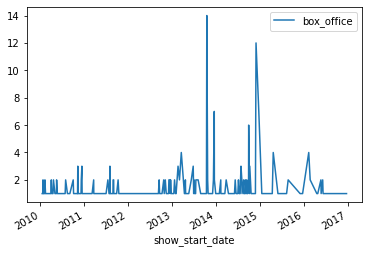

In [83]:
# строим график зависимости низкого сбора от даты премьеры
(df.query('box_office<3000')
 .sort_values(by=['box_office'])
 .pivot_table(index='show_start_date', 
              values='box_office', aggfunc='count')
 .plot()
);

Предположение, что низкие сборы обусловлены близкой датой премьеры к дате выгрузки базы, не подтвердилось.

Ожидаемо, что в лидерах по сборам фильмы, у которых:
1. дата выхода фильма близка к дате проката в базе.
2. фильмы безусловно известные.

Фильмы с маленькими сборами:
1. малоизвестные фильмы
2. для некоторых на Кинопоиске отсутствуют сборы в России (например https://www.kinopoisk.ru/film/635011/)
3. возможно, что на конкретный прокат, указанный в базе не было сбора (например https://www.kinopoisk.ru/film/438384/: год выпуска 2009, дата премьеры май 2010, сборы в России на Кинопоиске $119 045, а в базе 0 - не похоже, что на дату выгрузки у этого фильма еще не было информации о сборах)

Посмотрим на данные по остальным колонкам.

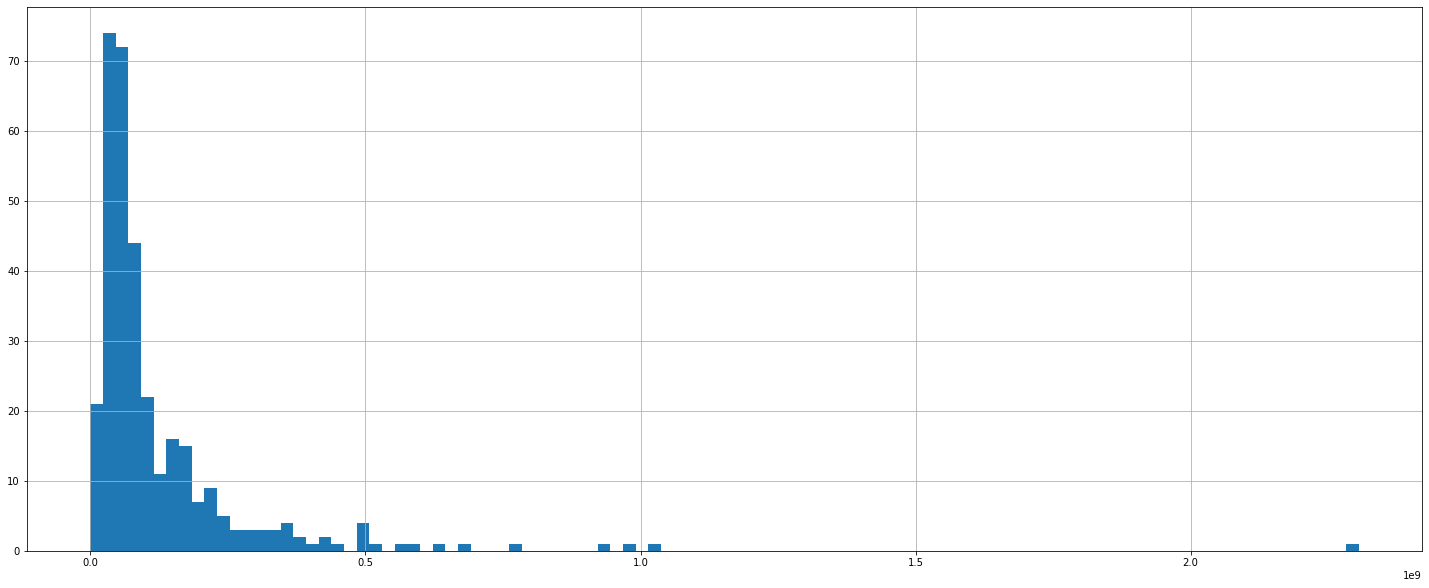

count             332.00
mean      127,229,716.68
std       188,588,333.12
min                 0.00
25%        42,000,000.00
50%        68,649,916.00
75%       141,985,319.50
max     2,305,074,303.00
Name: budget, dtype: float64

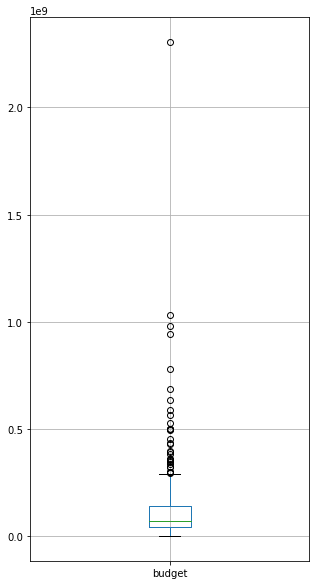

In [84]:
# смотрим статистику и графики по колонке box_office
describe_hist_boxplot('budget', bins=100)

Бюджет фильма в базе указан только для фильмов получивших господдержку. и всего их в базе 332 (всего 4% от общего кол-ва). Странно тут видеть минимальное значение 0. Есть и отдельные выбросы 0,5-2млрд. Интересно, что это за фильмы. Посмотрим поближе график.

до 30млн


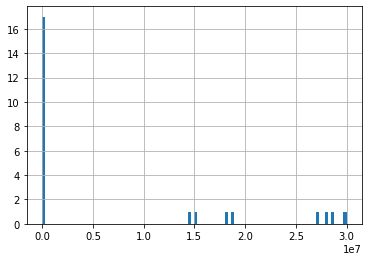

от 30млн до 200млн


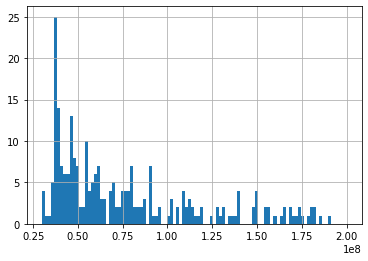

от 200млн до 2,4 мдрл


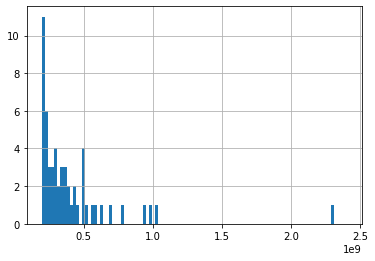

In [85]:
# построим гистрограмму по значения budget
# до 30млн
print('до 30млн')
df['budget'].hist(bins=100, range=(0,30000000))
plt.show()
# от 30млн до 200млн
print('от 30млн до 200млн')
df['budget'].hist(bins=100, range=(30000000,200000000))
plt.show()
# от 200млн до 2,4 мдрл
print('от 200млн до 2,4 мдрл')
df['budget'].hist(bins=100, range=(200000000,2400000000));

По гистограммам видим:
1. 17 фильмов с нулевым бюджетом
2. Минимальный ненулевой бюджет - ок 14 млн
3. Единицы фильмов с бюджетом более 200млн
4. Один фильм сильно выделяется большим бюджетом в 2,3 млрд

Интересно посмотреть на фильмы с нулевым бюджетом.

In [86]:
# отфильтруем значения 0 в budget
df.query('budget==0')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Бюджет нулевой, а государственное финансирование есть. и таких 5% от общего числа заполненных данных о бюджете. На сайте государственной поддержки https://ekinobilet.fond-kino.ru/government-support/ у некоторых фильмов в графе бюджет указано "Данные не предоставлены правообладателем". 15 фильмов в базе с нулевым значением совпадают по названию с этой выборкой, и еще у 2-х фильмов частично совпадают названия. Значит, это не ошибка, а техническая особенность предоставленных данных.

Посмотрим на возвратное и невозвратное финансирование.

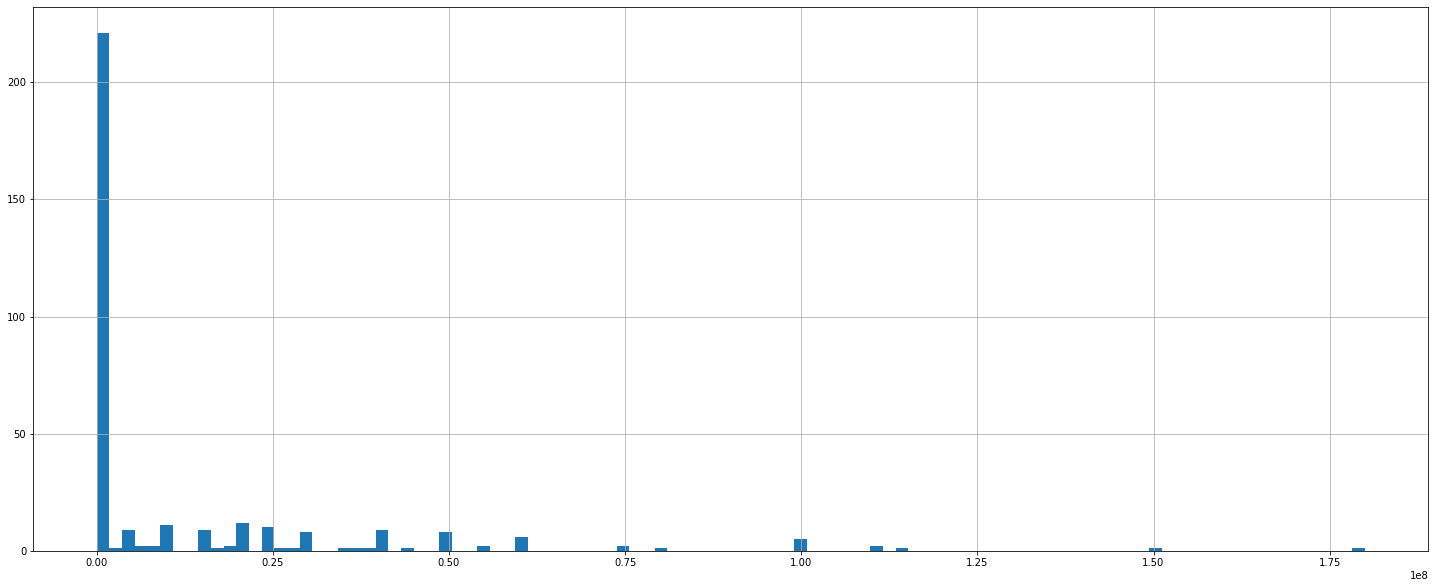

count           332.00
mean     11,864,457.83
std      24,916,555.26
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

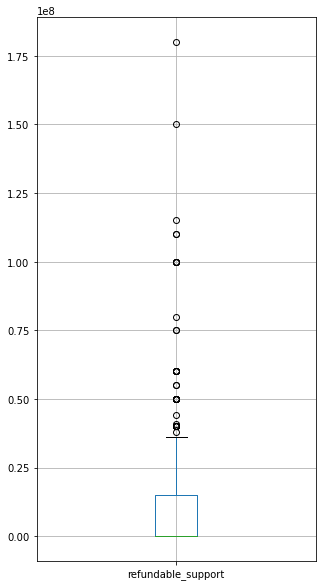

In [87]:
# смотрим статистику и графики по колонке refundable_support
describe_hist_boxplot('refundable_support', bins=100)

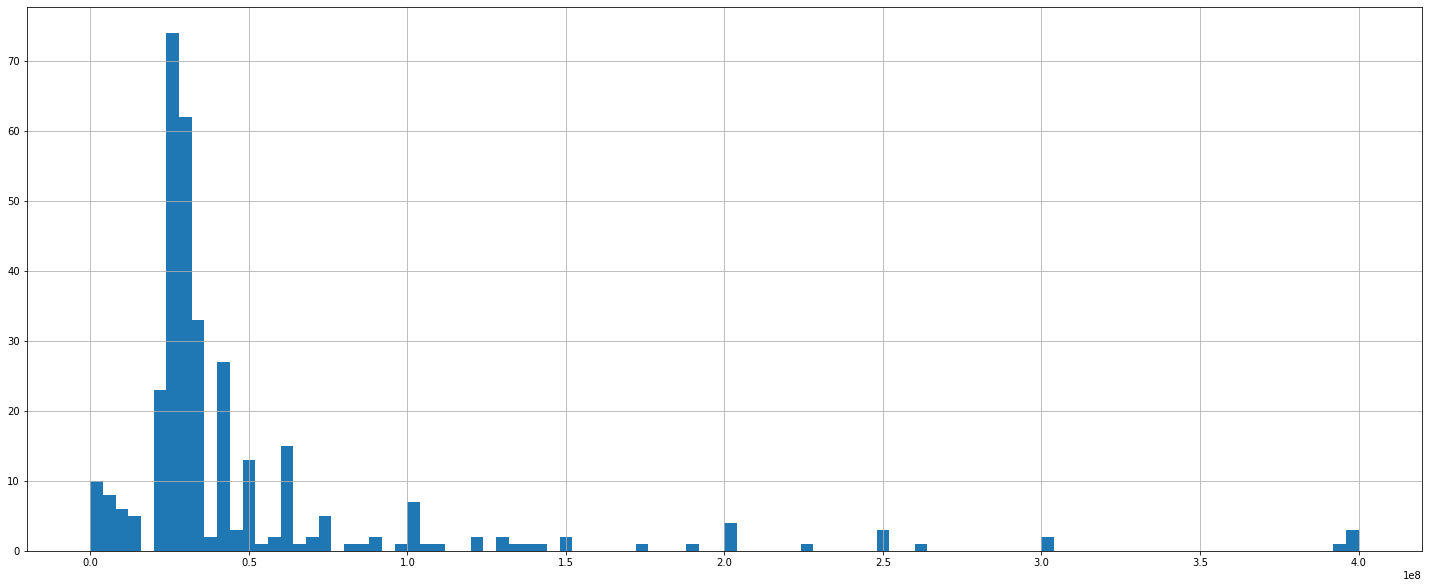

count           332.00
mean     48,980,988.89
std      59,980,117.92
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      40,375,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

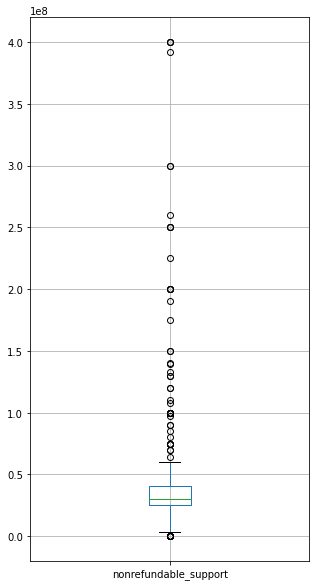

In [88]:
# смотрим статистику и графики по колонке nonrefundable_support
describe_hist_boxplot('nonrefundable_support', bins=100)

Невозвратную господдержку раздают чаще, чем возвратную. И размах у невозвратной до 400млн, а у возвратной до 180млн. В этих графах нулевые значения могут вызвать вопросы только в том случае, если они в обоих столбцах сразу. Проверим, есть ли такие пересечения.

In [89]:
# отфильтруем нулевые значения в nonrefundable_support и refundable_support
df.query('refundable_support==0 and nonrefundable_support==0')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Таких пересечений нет. Значит нули имеют место быть. Отдельные выбросы также допустимы. Некоторые фильмы государство готово спонсировать в больших объемах. Другое дело, окупаются ли эти вложения. Изучим это дальше.

Но для дальнейшего исследования нули в бюджете будут мешать. Удалим эти 17 строк. (5% от информации с господдержкой, 0,2% от общего числа срок)

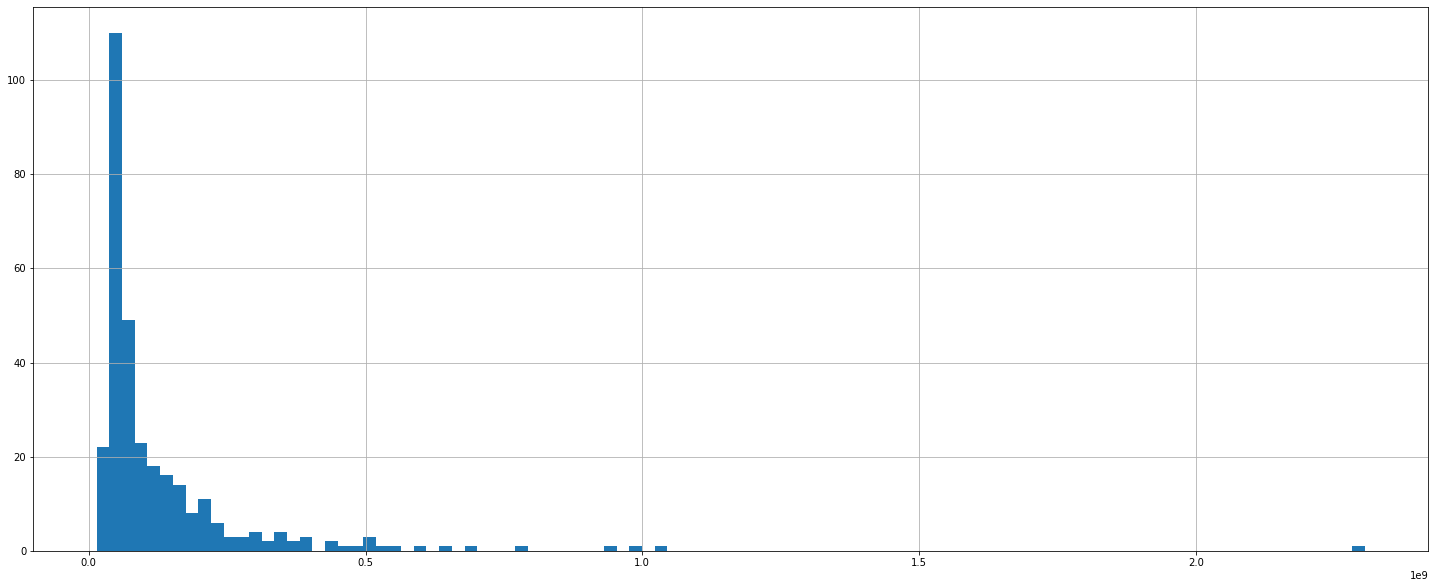

count             315.00
mean      134,096,082.35
std       191,226,039.63
min        14,462,464.00
25%        46,153,866.50
50%        73,379,554.00
75%       150,004,286.50
max     2,305,074,303.00
Name: budget, dtype: float64

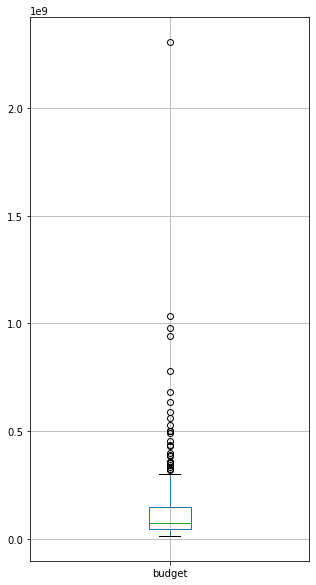

In [90]:
# удаляем строки с 0 бюджетом
df=df.query('budget!=0')
# проверяем удаление, смотрим статистику и графики по колонке box_office
describe_hist_boxplot('budget', bins=100)

#### Добавляем новые столбцы
- столбец с информацией о годе проката `show_start_year`
- с именем и фамилией главного режиссёра `main_director`
- с основным жанром фильма `main_genres`

(В столбцы войдут первые значения из списка режиссёров и жанров соответственно)

- с долей государственная поддержки от общего бюджета фильма `ratio_support_budget`

In [91]:
# создаем столбец с годом премьеры
df['show_start_year'] = df['show_start_date'].dt.year
# смотрим первые строчки df
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015


In [93]:
# создаем функцию, которая возвращает левые символы до ","

def split_name(row):
    """
    Функция возвращает первую часть строки до разделителя ","
    
    """
    return row.split(',')[0]

# создаем столбец  main_director в df
df['main_director']=df['director'].apply(split_name)

# смотрим первые 10 строчек df
df.head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016,В.Абдрашитов
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00",2013,В.Меньшов
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.60,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия,криминал",NaN,2016,Эрик Беснард
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN,2014,В.Титов


In [94]:
# создаем столбец  main_genres в df
df['main_genres']=df['genres'].apply(split_name)

# смотрим первые 10 строчек df
df.head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016,В.Абдрашитов,драма
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00",2013,В.Меньшов,мелодрама
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.60,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро,мюзикл
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия,криминал",NaN,2016,Эрик Беснард,комедия
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN,2014,В.Титов,мелодрама


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [95]:
# создаем столбец ratio_support_budget в df
df['ratio_support_budget']=round(((df['refundable_support']+df['nonrefundable_support'])/df['budget']*100),0)
# смотрим df без пропусков в ratio_support_budget с сортировкой по нему
df[df['ratio_support_budget'].isna()==False].sort_values(by=['ratio_support_budget'])

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,ratio_support_budget
5599,За гранью реальности,111010817,2017-11-27 12:00:00+00:00,Художественный,"ООО ""КИНОДАНЦ""",Россия,А.Богуславский,"В.Денисюк, Е.Мелентьев",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","136,230,333.00",Министерство культуры,5.20,"приключения,фэнтези","126,713,450.16",2017,А.Богуславский,приключения,4.00
3731,Танцы насмерть,111013416,2016-08-31 12:00:00+00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""ЦЕНТРОКИНО""",Россия,А.Волгин,"В.Денисюк, Е.Мелентьев",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","90,278,063.00",Министерство культуры,4.00,фантастика,"9,680,744.00",2016,А.Волгин,фантастика,7.00
7170,Грех,111014419,2019-08-31 12:00:00+00:00,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,"Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+» - для детей старше 16 лет,0.00,"60,000,000.00","779,941,965.00",Министерство культуры,6.90,"драма,биография,история","54,243,202.71",2019,А.Михалков (псевдоним А.Кончаловский),драма,8.00
7179,Байкал - Сердце мира 3D,112004619,2019-11-01 12:00:00+00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.00,"3,000,000.00","33,000,000.00",Министерство культуры,8.00,семейный,NaN,2019,А.Попова,семейный,9.00
3041,Крякнутые каникулы,114003615,2015-12-22 12:00:00+00:00,Анимационный,"ООО ""Анимационная студия РИМ""",Россия,В.Лакисов,"Р.Атоян, В.Зорин, О.Бровченко",«6+» - для детей старше 6 лет,"40,000,000.00",0.00,"399,075,326.00",Фонд кино,5.40,"мультфильм,комедия,приключения","69,693,747.93",2015,В.Лакисов,мультфильм,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,Ёлки 5,111018016,2016-12-15 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,"Т.Бекмамбетов, И.Джендубаев, А.Котт, А.Шавкеро...","Т.Бекмамбетов, И.Стромилова, М.Затуловская",«6+» - для детей старше 6 лет,0.00,"150,000,000.00","215,162,287.00",Фонд кино,4.80,"семейный,комедия","308,401,482.70",2016,Т.Бекмамбетов,семейный,70.00
2898,Преображение (2015),111007016,2016-04-08 12:00:00+00:00,Художественный,"ООО ""АБС""",Россия,"Т.Воронецкая, Д.Сергин",Е.Белова,«16+» - для детей старше 16 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,5.70,ужасы,"56,800.00",2016,Т.Воронецкая,ужасы,70.00
2378,Экспириенс,111000315,2015-01-13 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,Е.Татаров,А.Тютрюмов,«16+» - для детей старше 16 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,4.70,драма,"36,550.00",2015,Е.Татаров,драма,70.00
2526,Вдвоем на льдине.,111011015,2015-06-25 12:00:00+00:00,Художественный,"ООО ""Первое творческое объединение""",Россия,"Н.Джорджадзе, В.Игнатьев","П.Поляков, И.Букреев",«12+» - для детей старше 12 лет,0.00,"26,500,000.00","37,943,652.00",Министерство культуры,6.60,мелодрама,"4,450.00",2015,Н.Джорджадзе,мелодрама,70.00


#### Вывод
Предобработка обнаружила проблемы в данных:

- нарушения в стиле заголовков
- пропуски в столбцах
- неявные дубликаты

Что было сделано:

заголовки:
- исправили заголовок `puNumber` на `pu_number`, чтобы упростить работу с таблицей.

пропуски:
- 0,1% пропусков `director` были удалены.
- 13% пропусков `genres` заполнены значением `unknown`
- оставлены пропуски в `nonrefundable_support`, `refundable_support`, `financing_source`, `budget`, `box_office`, `ratings`, `producer`, `film_studio`, `production_country`

дубликаты:
- неявные дубликаты в `production_country`, `ratings`,  были максимально устранены.
- удалены лишние пробелы во всех текстровых ячейках.
- полностью не устранены неявные дубликаты в `title`, `film_studio`, `production_country`, `director`, `producer`, `genres`
- удалены два дублирующих номера в `pu_number` (4 строчки 0,05%)

аномалии:
- аномальные значение `budget` удалены (0,1% от общего числа данных)

тип данных:
- изменили тип данных у `show_start_date` на `datetime64`
- изменили тип данных у `ratings` на `float64`

добавлены столбцы:
- с информацией о годе проката `show_start_year`
- с именем и фамилией главного режиссёра `main_director`
- с основным жанром фильма `main_genres`
- с долей государственная поддержки от общего бюджета фильма `ratio_support_budget`

Можно переходить к исследованию.

### Шаг 3. Проведите исследовательский анализ данных


1. Посмотрим, сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных.
2. Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
3. С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года. Сравним значения.
4. Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? 

Из данных известрно, что один фильм мог получить несколько прокатных удостоверений в один год и в разные года. Но сборы фильма в 2010 и в 2019 годах могут сильно отличаться. Т.к. мы будем исследовать фильмы по годам, необходимо проверить есть ли одиннаковые фильмы выходившие в прокат в один год.

#### Cколько фильмов выходило в прокат каждый год
1. Посмотрим, сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных.

***
ВАЖНОЕ УТОЧНЕНИЕ:
В данном пункте будем считать не кол-во уникальных фильмов в каждый год, а кол-во прокатов, перефразируя вопрос на:
"Посмотрим, прокатов фильмов было каждый год. Посчитаем, какую долю составляют прокаты с указанной информацией о сборах в кинотеатрах. Проанализируем, как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных".

Изначально, было предположение, что в данном пункте надо считать именно уникальные фильмы, сгруппировав их по названию и сложив сборы от разных прокатов. Но т.к. сумма сборов у одного фильма в 2010 году и в 2019 может сильно отличаться, и исследование предполагается делать по годам, следовательно сборы за разные года складывать неверно. Было принято решение что в вопросе "сколько фильмов выходило в прокат каждый год" имеется ввиду именно кол-во прокатов для учебного проекта.

В рабочем проекте уточнили бы этот вопрос, потому что мнения по толкованию вопроса в брифе не однозначные. 

***

Для начала отфильтруем с прокатами, где известны сборы в кинотеатрах.

In [96]:
# отфильтруем в df_box_office строки из df с заполненными данными в box_office
df_box_office=df[df['box_office'].isna()==False]
# отобразим первые 10 строк в df_box_office
df_box_office.head(10)


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,ratio_support_budget
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00",2013,В.Меньшов,мелодрама,NaN
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.00,"мелодрама,комедия",360.00,2016,Ю.Чулюкин,мелодрама,NaN
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,420.00,2016,В.Краснопольский,драма,NaN
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.70,"комедия,мелодрама,криминал",380.00,2013,Л.Гайдай,комедия,NaN
38,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.10,драма,"1,165.00",2013,И.Бабич,драма,NaN
47,Андрей Рублев.,111029814,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Тарковский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,"драма,биография,история","22,660.00",2014,А.Тарковский,драма,NaN
50,Асса,111005815,2015-04-23 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,С.Соловьев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.00,"фэнтези,боевик","84,720.00",2015,С.Соловьев,фэнтези,NaN
52,Айболит - 66,111010513,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ролан Быков,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.10,"мюзикл,комедия,детский","1,795.00",2013,Ролан Быков,мюзикл,NaN
61,Американская дочь,111005515,2015-04-23 12:00:00+00:00,Художественный,"АО ""Караван"", Компания ""Америкен Дистрибьюшн"",...","Россия, Казахстан, США",К.Шахназаров,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"драма,комедия",300.00,2015,К.Шахназаров,драма,NaN
64,Аттестат зрелости,111005915,2015-04-23 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Т.Лукашевич,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.90,драма,"67,500.00",2015,Т.Лукашевич,драма,NaN


Посчитаем, кол-во прокатов, сумму, среднюю и медиану для сборов.

In [97]:
# сделаем сводную таблицу с подсчетом кол-ва прокатов фильмов на каждый год
df_box_office_pivot=(df_box_office
 .pivot_table(index='show_start_year', values='box_office', aggfunc=('count','sum', 'mean', 'median'))
 .reset_index()
)
# отобразим таблицу
df_box_office_pivot

,show_start_year,count,mean,median,sum
0,2010,105,"23,130.04","1,700.00","2,428,654.00"
1,2011,109,"129,383.17","3,000.00","14,102,765.00"
2,2012,127,"54,417.90","5,560.00","6,911,073.00"
3,2013,184,"161,954.92","3,522.50","29,799,706.20"
4,2014,278,"26,743,589.36","18,137.50","7,434,717,843.10"
5,2015,459,"83,938,621.35","4,784,781.50","38,527,827,199.09"
6,2016,523,"89,373,453.67","3,776,087.56","46,742,316,269.48"
7,2017,355,"136,501,823.25","9,919,415.00","48,458,147,253.75"
8,2018,471,"104,568,983.88","8,751,895.75","49,251,991,405.20"
9,2019,529,"91,262,952.65","4,601,033.60","48,278,101,953.08"


Добавим в таблицу информацию по прокатам из всей базы и доли прокатов с известными сборами к ко всем прокатам.

In [98]:
# сделаем сводную таблицу с подсчетом кол-ва прокатов фильмов на каждый год по всей базе
df_pivot=df.pivot_table(index='show_start_year', values='pu_number', aggfunc='count')

# соединяем таблицы df_pivot и df_box_office_pivot в переменную df_box_office_pivot
df_box_office_pivot=df_box_office_pivot.merge(df_pivot, on='show_start_year', how='outer')

# переименуем стобцы
df_box_office_pivot.columns=['year','bo_count', 'bo_mean', 'bo_median', 'bo_sum','total_count']

# посчитаем долю прокатов с известными сборами от общего числа прокатов по годам
df_box_office_pivot['ratio_bo_total_count']=(round((df_box_office_pivot['bo_count']
                                                    /df_box_office_pivot['total_count']*100),0))


# смотрим df_box_office_pivot
df_box_office_pivot

,year,bo_count,bo_mean,bo_median,bo_sum,total_count,ratio_bo_total_count
0,2010,105,"23,130.04","1,700.00","2,428,654.00",976,11.00
1,2011,109,"129,383.17","3,000.00","14,102,765.00",620,18.00
2,2012,127,"54,417.90","5,560.00","6,911,073.00",592,21.00
3,2013,184,"161,954.92","3,522.50","29,799,706.20",629,29.00
4,2014,278,"26,743,589.36","18,137.50","7,434,717,843.10",805,35.00
5,2015,459,"83,938,621.35","4,784,781.50","38,527,827,199.09",699,66.00
6,2016,523,"89,373,453.67","3,776,087.56","46,742,316,269.48",815,64.00
7,2017,355,"136,501,823.25","9,919,415.00","48,458,147,253.75",503,71.00
8,2018,471,"104,568,983.88","8,751,895.75","49,251,991,405.20",887,53.00
9,2019,529,"91,262,952.65","4,601,033.60","48,278,101,953.08",929,57.00


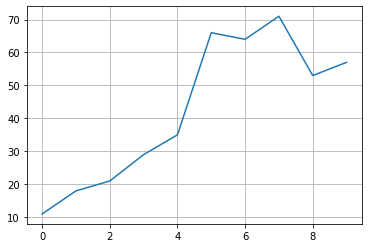

In [99]:
# построим график доли фильмов с указанной информацией о прокате в кинотеатрах по отношению ко всей базе по годам
df_box_office_pivot['ratio_bo_total_count'].plot(grid=True);

In [100]:
# посчитаем долю строк с указанным сбором к общему числу строк 
(print('Доля фильмов с указанной информацией о прокате в кинотеатрах'
       ,round((len(df_box_office)/len(df)*100),0)
       , 'от общего числа фильмов в базе.')
)

Доля фильмов с указанной информацией о прокате в кинотеатрах 42.0 от общего числа фильмов в базе.


Итак, всего 42% строк с указанным размером сборов. Важно помнить, что учитываются не уникальные названия фильмов, а каждый отдельный прокат. С 2010г доля фильмов с указанной информацией о прокате в кинотеатрах растет. В 2015 году резкий рост, в 2017 - пик. В 2018 небольшое снижение.

Известно, что в 2015 году создана Единая федеральная автоматизированная информационная система сведений о показах фильмов в кинозалах (ЕАИС) для обеспечения прозрачности рынка и формирования базы данных для официальной статистики: все российские кинотеатры, осуществляющие коммерческий кинопоказ, были обязаны к ней подключиться. Возможно именно этим вызван рост сборов в 2015 году в базе.

Полнее всего представлен 2017 год - по 71% данных известны сборы.

Посмотрим сколько фильмов выходило в прокат каждый год.

0.9101321860035176

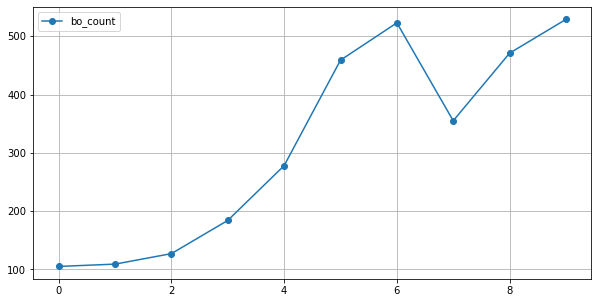

In [106]:
# построим график зависимости кол-ва прокатов фильмов от года
df_box_office_pivot.plot(y='bo_count',grid=True, style='o-', figsize=(10,5))

# посчитаем корреляцию
df_box_office_pivot['year'].corr(df_box_office_pivot['bo_count'])

С 2010 по 2016 год кол-во прокатов в кинотеатрах росло от 105 до 523, в 2017 был спад до 355 и потом опять рост до 529 в 2019 году. На рост указывает также положительная корреляция 0,9.

Чем обусловлен спад 2017 года? Можно предположить: с учетом того, что на создание фильма уходит несколько лет, а в 2014-2015 был кризис, к 2017 году фильмов выпустили меньше. Возможно, данные были выгружены не полностью, а выборочно. Или прокатов действительно было меньше.

Посмотрим на суммы сборов.

#### Динамика проката по годам.
2. Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

0.9166902824721413

count               10.00
mean    23,874,634,412.19
std     23,872,945,883.89
min          2,428,654.00
25%         18,027,000.30
50%     22,981,272,521.10
75%     47,894,155,532.18
max     49,251,991,405.20
Name: bo_sum, dtype: float64

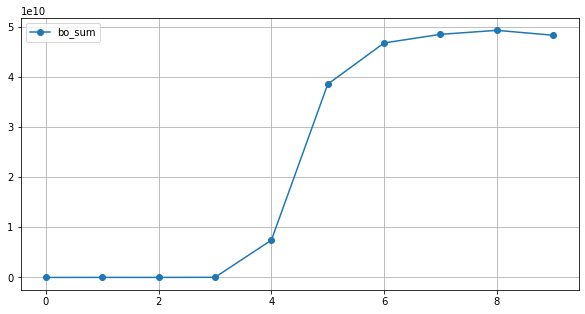

In [107]:
# построим график зависимости общей суммы сборов фильмов от года
df_box_office_pivot.plot(y='bo_sum',grid=True, style='o-', figsize=(10,5))

# посчитаем корреляцию
display(df_box_office_pivot['year'].corr(df_box_office_pivot['bo_sum']))

# отобразим описательную статистику
df_box_office_pivot['bo_sum'].describe()

Минимальная сумма сборов 2,4млн в 2010 году, максимальная 49млн в 2018г.

И тут корреляция положительная и близкая к единице, но нет провала в сборах в 2017 году, как в кол-ве прокатов.

Небольшое снижение в 2019 можеты быть связано с тем, что информация по 2019 году была еще не полностью заполнена на момент выгрузки базы.

Посмотрим, на средние и медианные значения.

#### Cредняя и медианная сумма сборов для каждого года.
3. С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года. Сравним значения.

0.8864059082531452

0.8070214652060077

,bo_mean,bo_median
count,10.00,10.00
mean,"53,275,831.02","3,186,513.34"
std,"52,979,846.66","3,826,438.23"
min,"23,130.04","1,700.00"
25%,"137,526.11","4,031.88"
50%,"55,341,105.36","1,897,112.53"
75%,"90,790,577.91","4,738,844.53"
max,"136,501,823.25","9,919,415.00"


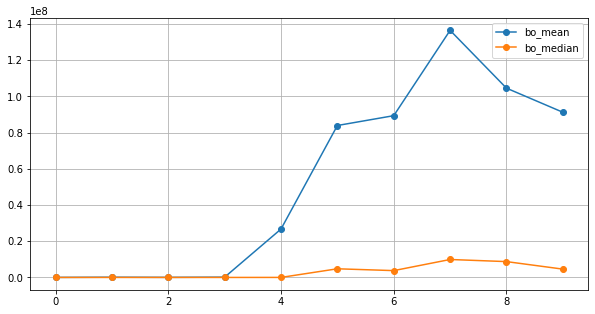

In [109]:
# построим график зависимости средних и медианных сборов фильмов от года
df_box_office_pivot.plot(y=['bo_mean', 'bo_median'],grid=True, style='o-', figsize=(10,5))

# посчитаем корреляцию
display(df_box_office_pivot['year'].corr(df_box_office_pivot['bo_mean']), 
        df_box_office_pivot['year'].corr(df_box_office_pivot['bo_median']))

# отобразим описательную статистику
df_box_office_pivot[['bo_mean', 'bo_median']].describe()

И для медианы, и для средней корреляция чуть ниже, чем для суммы сборов и суммы прокатов (0,88 и 0,8), но она также положительна и близка к единице. Однако, максимум средней доходит до 136 млн в том же 2017 году, когда в кол-ве прокатов был спад, а медиана идет ровнее (максимум на 9,9 млн в том же 2017 году). По двум линиям ожидаемо почти прямая линия у нуля до 2013-2014г.

В чем секрет 2017 года? Посмотрим на фильмы за 2016-2018 года.

C:\Users\aivon\AppData\Local\Temp\ipykernel_5276\3905195505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box_office['box_office_cat'] = pd.cut(df_box_office.box_office, [-1,1000000,


show_start_year,2016,2017,2018
box_office_cat,,,
до 1млн,160,57,68
1-5млн,121,77,118
1-50млн,121,125,163
50-500млн,92,60,93
500млн-1млрд,19,26,18
от 1млрд,10,10,11


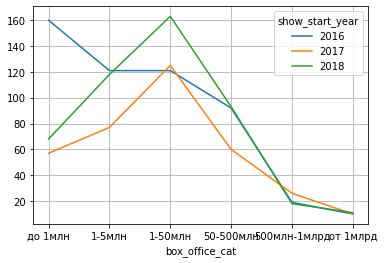

In [111]:
# добавим столбец box_office_cat с тремя категориями прокатов в зависимости от сборов
df_box_office['box_office_cat'] = pd.cut(df_box_office.box_office, [-1,1000000, 
                                                5000000, 
                                                50000000,
                                               500000000,
                                                1000000000,
                                               4000000000], 
                               labels=['до 1млн','1-5млн','1-50млн', '50-500млн','500млн-1млрд','от 1млрд'])
# в df_box_office_exp оставим три столбца из df_box_office
df_box_office_exp=df_box_office[['box_office_cat','show_start_year','genres']]
# сделаем сводную таблицу с подсчетом кол-ва прокатов в каждой категории за 2016-2018года
(display(df_box_office_exp.query('2016<=show_start_year<=2018')
 .pivot_table(index='box_office_cat',columns='show_start_year'
              , values='box_office_cat', aggfunc=('count')))
)

(df_box_office_exp.query('2016<=show_start_year<=2018')
 .pivot_table(index='box_office_cat',columns='show_start_year'
              , values='box_office_cat', aggfunc=('count'))
 .plot(grid=True)
);

Фильмов-миллиардников в 2016-2018 года было в прокате почти одиннаковое кол-во (10-11). Зато менее успешных по сборам фильмов в 2017 году меньше:
 * до 1 млн в 2017-2018 почти в 2,5 раза меньше, чем в 2016.
 * 1-5 млн в 2017 почти в 2 раза меньше, чем в 2016 и 2018

И в целом по графику видно, что в 2016 году кол-во фильмов падает с ростом сборов, а в 2017 и 2018 растет до середины графика и потом все соединяются у отметки в 1 млрд и более.

Кроме того, важно отметить, что фильмов в категории 0,5-1млрд 2017 год в лидерах с заметным отрывом. Это объясняет то, что хотя 2018 был лидером по сумме сбора, но имел большее кол-во прокатов, 2017 год по качеству выходит на первое место: прокатов мало, но фильмы по сборам лучше. (И медиана, и среднее лишенее тому подтверждение)

####  Возрастное ограничение аудитории и сборы фильма
4. Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? 

show_start_year,2015,2016,2017,2018,2019,total
0+,"379,054,578.37","150,228,848.67","229,598,930.00","32,449,002.11","17,746,066.82","809,077,425.97"
12+,"13,419,509,570.51","11,150,762,103.96","7,851,427,660.67","14,267,291,660.69","12,680,198,773.67","59,369,189,769.50"
16+,"10,781,600,601.27","16,594,249,489.74","18,694,590,951.06","16,278,405,946.93","12,753,418,984.60","75,102,265,973.60"
18+,"5,430,350,628.93","6,793,929,818.87","9,651,495,581.02","8,760,085,501.15","10,121,796,303.64","40,757,657,833.61"
6+,"8,517,311,820.01","12,053,146,008.24","12,031,034,131.00","9,913,759,294.32","12,704,941,824.35","55,220,193,077.92"


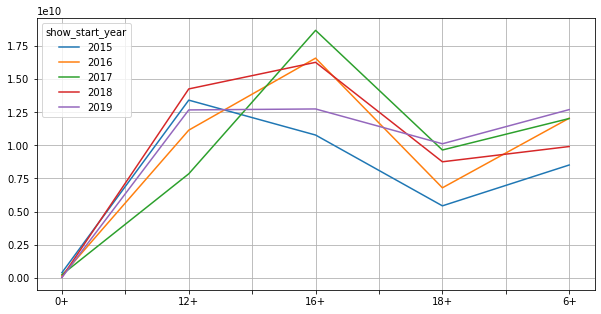

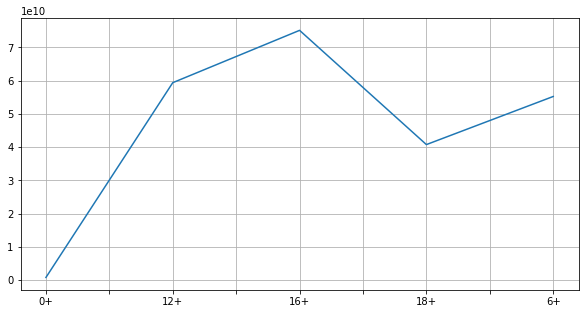

In [112]:
# сделаем сводную таблицу с подсчетом кол-ва прокатов фильмов, суммы сборов на каждую возрастную категорию с 2015 по 2019 годы 
df_box_office_pivot_age=(df_box_office.query('2015<=show_start_year<=2019')
 .pivot_table(index='age_restriction', columns='show_start_year', values='box_office', aggfunc='sum')
)

df_box_office_pivot_age.index=['0+','12+','16+','18+','6+']

df_box_office_pivot_age['total']=(df_box_office_pivot_age[2015]+df_box_office_pivot_age[2016]
                                 +df_box_office_pivot_age[2017]+df_box_office_pivot_age[2018]
                                 +df_box_office_pivot_age[2019])

# смотрим сводную таблицу
display(df_box_office_pivot_age)

# построим график зависимости сборов от возрастного ограничения по годам
df_box_office_pivot_age[[2015,2016,2017,2018,2019]].plot(grid=True, figsize=(10,5))
plt.show()

# построим график зависимости сборов от возрастного
df_box_office_pivot_age['total'].plot(grid=True, figsize=(10,5));

Возрастное ограничение сильно влияет на сборы. В зависимости от года разница по доходам в разных возрастных категориях немного отличается, но единый тренд сохраняется: 
* меньше всего сборов у категории 0+
* больше всего у категории 16+, 12+ и 6+
* категория 18+ собирает больше, чем 0+, но уступает остальным

Связано это скорее всего с объемом целевой аудитории. Дети до 6-ти лет редкие посетители кинотеатров. А фильмы категории 18+ на любителя. Больший сегмент ЦА кинотеатров приходятся на 16+, 12+ и 6+. 

#### Вывод
После изучения кол-ва прокатов и сборов по годам можно резюмировать:
1. В данных информация о сборах в кинотеатрах только для 42% данных, Полнее всего представлен 2017 год - по 71% данных известны сборы.
2. Кол-во прокатов в кинотеатрах росло на протяжении всего времени с 2010 по 2019г со снижением в 2017г.
3. Минимальная сумма сборов 2,4млн в 2010 году, максимальная 49млн в 2018г.
4. Общие суммы сборов, а также медианы и средние росли преимущественно с 2013-2014 года, а резкий скачок был с 2015г. Это можно объяснить тем, что с 2015 года все российские кинотеатры были обязаны подключиться к ЕАИС. Также видно, что в 2017 году нет провала по сборам: общая сумма сборов в 2017 близка к максимуму - 48млн, а у средней и медианной пик как раз в 2017г. 
5. Если провал в кол-ве прокатов не связан с техническим сбоем, то в 2017 году было выпущено меньше фильмов в целом, но по качеству сборов они были лучше не за счет кол-ва фильмов-миллиардников, а за счет относительно небольшого кол-ва фильмов с низкими сборами.
6. Возрастное ограничение сильно влияет на сборы: 
    * меньше всего сборов у категории 0+
    * больше всего у категории 16+, 12+ и 6+
    * категория 18+ собирает больше, чем 0+, но уступает остальным

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

1. За какой период есть данные о государственной поддержке кинематографа? Какая доля Российского кинематографа за эти годы получила поддержку от государства? Есть ли среди фильмов с государственной поддержкой межународные проекты?
2. Сколько фильмов ежегодно получали государственную поддежку? На какую сумму? Какую долю от бюджета фильма составляла эта поддержка? Как изменялась доля возвратной и невозвратной частей по годам?
3. Какой источник финансирования чаще принимал участие в поддержке? А какой больше выделил денег?
4. Сколько фильмов окупилось, а сколько оказались убыточны? Как это связано с бюджетом? А с рейтингом?
5. Зависит ли поддержка государства от жанра фильма? Какие жанры больше всего поддерживаются государством?
6. Какие жанры собирают большие кассы? Смотрим по всей базе, где есть сборы.
7. Какие отечественные фильмы самые успешные по рейтингу? А по сборам? Какие фильмы были поддержаны государством?

*** 

Для начала выделим из всей базы фильмы с государственной поддержкой `df_support` и фильмы отечественного производства `df_russia`

Посмотрим, сколько уникальных фильмов в этих датафреймах.

***

In [113]:
# отфильтруем в df_support строки из df с заполненными данными в budget
df_support=df[df['budget'].isna()==False]

# считаем дубликаты по совпадениям в названиях, режиссере
print(df_support[['title','director']].duplicated().sum())

# отобразим первые 10 строк в df_support
display(df_support.head(10))

# посмотрим общую информацию
df_support.info()

0


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,ratio_support_budget
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,33.00
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,unknown,"28,140.00",2014,А.Якимчук,unknown,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,61.00
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.00
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,62.00
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,"25,000,000.00","51,850,000.00",Министерство культуры,6.10,"мультфильм,фэнтези,история","15,078,858.60",2015,С.Серегин,мультфильм,48.00
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,"50,000,000.00","100,000,000.00","220,588,394.00",Фонд кино,8.50,"драма,военный,история","249,166,767.70",2015,Р.Давлетьяров,драма,68.00
1870,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.00,"46,502,299.00","86,210,067.00","Министерство культуры, Фонд кино",6.70,драма,"4,731,239.50",2014,В.Глаголева,драма,54.00
1902,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,"75,000,000.00","139,551,503.00",Фонд кино,7.00,"триллер,боевик,приключения","352,804,320.40",2015,А.Войтинский,триллер,54.00
1911,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.00,"34,000,000.00","48,571,430.00",Министерство культуры,7.40,"фэнтези,приключения,драма","51,907.50",2015,Д.Федоров,фэнтези,70.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 1281 to 7477
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  315 non-null    object             
 1   pu_number              315 non-null    int32              
 2   show_start_date        315 non-null    datetime64[ns, UTC]
 3   type                   315 non-null    object             
 4   film_studio            315 non-null    object             
 5   production_country     315 non-null    object             
 6   director               315 non-null    object             
 7   producer               313 non-null    object             
 8   age_restriction        315 non-null    object             
 9   refundable_support     315 non-null    float64            
 10  nonrefundable_support  315 non-null    float64            
 11  budget                 315 non-null    float64        

315 фильмов с господдержкой. Все уникальные по названию и режиссеру. Рейтинга нет у 15, сборов у 14.

In [114]:
# отфильтруем в df_support строки из df с заполненными данными в budget
df_russia=df[df['production_country']=='Россия']

# считаем дубликаты по совпадениям в названиях, режиссере
print(df_russia[['title','director']].duplicated().sum())

# отобразим первые 10 строк в df_russia
display(df_russia.head(10))

# посмотрим общую информацию
df_russia.info()

15


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,ratio_support_budget
336,Каникулы строгого режима,111008514,2014-08-07 12:00:00+00:00,Художественный,"ООО ""Кинобазза"" по заказу ЗАО ""Дирекция Кино""",Россия,И.Зайцев,"А.Максимов, Н.Попов, Д.Файзиев",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.10,"драма,комедия,приключения",360.00,2014,И.Зайцев,драма,NaN
462,Август. Восьмого,111000612,2012-02-07 12:00:00+00:00,Художественный,"ЗАО ""ПК ""ГЛАВКИНО""",Россия,Д.Файзиев,"Д.Файзиев, Ф.Бондарчук, И.Бачурин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.10,"драма,военный","6,775.00",2012,Д.Файзиев,драма,NaN
463,Тот еще...!,111001612,2012-02-20 12:00:00+00:00,Художественный,"ООО ""Энджой мувиз""",Россия,С.Андреасян,Г.Малков,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,2.60,"фэнтези,комедия,семейный","12,779.00",2012,С.Андреасян,фэнтези,NaN
464,КОКОКО,111003112,2012-06-05 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Глобус-фильм""",Россия,А.Смирнова,С.Сельянов,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.90,"драма,комедия",200.00,2012,А.Смирнова,драма,NaN
469,Разговор,111000712,2012-02-07 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КВФильм-Продакшн"", ООО ""Ком...",Россия,"В.Иванов, С.Комаров",В.Карев,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"триллер,драма,детектив",NaN,2012,В.Иванов,триллер,NaN
470,Сделка .,111000912,2012-02-08 12:00:00+00:00,Художественный,"ООО ""Студия Продюсерского Кино""",Россия,А.Силкин,"В.Зверев, М.Линьков",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.80,"ужасы,фэнтези,боевик","13,350.00",2012,А.Силкин,ужасы,NaN
471,Продавец игрушек,111001012,2012-02-08 12:00:00+00:00,Художественный,"ООО ""Национальное кино""",Россия,Ю.Васильев,В.Добросоцкий,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.90,"мелодрама,комедия","10,310.00",2012,Ю.Васильев,мелодрама,NaN
472,901 километр,111001112,2012-02-08 12:00:00+00:00,Художественный,"ООО ""ВолгаКино""",Россия,Б.Куломзин,"А.Крутов, Л.Кашин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.80,триллер,NaN,2012,Б.Куломзин,триллер,NaN
473,8 первых свиданий,111001212,2012-02-09 12:00:00+00:00,Художественный,"ООО ""Территория кино""",Россия,"Д.Додсон, А.Юрчиков","ООО ""Квартал Леополис"", ООО ""ПЦ ""Горад""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия","30,715.00",2012,Д.Додсон,мелодрама,NaN
474,Конвой.,111001312,2012-02-13 12:00:00+00:00,Художественный,"ООО ""Мастерская Павла Лунгина""",Россия,А.Мизгирев,"П.Лунгин, Е.Панфилов",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма",NaN,2012,А.Мизгирев,боевик,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 336 to 7478
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  1800 non-null   object             
 1   pu_number              1800 non-null   int32              
 2   show_start_date        1800 non-null   datetime64[ns, UTC]
 3   type                   1800 non-null   object             
 4   film_studio            1784 non-null   object             
 5   production_country     1800 non-null   object             
 6   director               1800 non-null   object             
 7   producer               1766 non-null   object             
 8   age_restriction        1800 non-null   object             
 9   refundable_support     299 non-null    float64            
 10  nonrefundable_support  299 non-null    float64            
 11  budget                 299 non-null    float64        

1800 фильмов российского производства. 15 дубликатов по названию и режиссеру - уникальных 1785. Рейтинга нет у 15, продюссера у 14.
Есть пропуски небольшие в колонках студия (16), продюссер (34). Рейтинг известен у 1280 фильмов (71%), а сборы у 761 фильма (42%). Всего 299 фильмов получили поддержку гос-ва.

#### Временной период и доля государственной поддержки.
1. За какой период есть данные о государственной поддержке кинематографа? Какая доля Российского кинематографа за эти годы получила поддержку от государства? Есть ли среди фильмов с государственной поддержкой межународные проекты?

In [115]:
df_support['show_start_date'].min(),df_support['show_start_date'].max()

(Timestamp('2013-09-10 12:00:00+0000', tz='UTC'),
 Timestamp('2019-12-26 12:00:00+0000', tz='UTC'))

Данные о господдержке имеются с 10.09.2013 по 26.12.2019. Известно, что глобальные изменения в системе государственной поддержки кинопроизводства начались 2009 года, а первые фильмы, вышедшие с участием государства в финансировании были в 2011 году. Это говорит о том, что в базе представлены не все данные.

In [116]:
print('Из ', len(df_support), 'фильмов с государственной поддержкой, международных проектов '
      , len(df_support.query('production_country!="Россия"')),' - '
     ,round((len(df_support.query('production_country!="Россия"'))/len(df_support)*100),0),'%')


print('Из ', len(df_russia.query('2013<=show_start_year<=2019'))-15
      , 'отечественных фильмов за 2013-2019г, с государственной поддержкой '
      , len(df_russia[df_russia['budget'].isna()==False]),' - '
     ,round((len(df_russia[df_russia['budget'].isna()==False])
             /(len(df_russia.query('2013<=show_start_year<=2019'))-15)*100),0),'%')

Из  315 фильмов с государственной поддержкой, международных проектов  16  -  5.0 %
Из  1427 отечественных фильмов за 2013-2019г, с государственной поддержкой  299  -  21.0 %


#### Государственная поддержка по годам
2. Сколько фильмов ежегодно получали государственную поддежку? На какую сумму? Какую долю от бюджетов фильмов составляла эта поддержка? Как изменялась доля возвратной и невозвратной частей по годам?

In [117]:
# добавим в df_support столбец support с суммой общей поддержки по фильму
df_support['support']=df_support['nonrefundable_support']+df_support['refundable_support']

# посмотрим первые 10 строк
df_support.head(10)

C:\Users\aivon\AppData\Local\Temp\ipykernel_5276\746778590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_support['support']=df_support['nonrefundable_support']+df_support['refundable_support']


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,ratio_support_budget,support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,33.00,"26,500,000.00"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,unknown,"28,140.00",2014,А.Якимчук,unknown,70.00,"26,000,000.00"
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,61.00,"107,847,945.00"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.00,"28,000,000.00"
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,62.00,"25,000,000.00"
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,"25,000,000.00","51,850,000.00",Министерство культуры,6.10,"мультфильм,фэнтези,история","15,078,858.60",2015,С.Серегин,мультфильм,48.00,"25,000,000.00"
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,"50,000,000.00","100,000,000.00","220,588,394.00",Фонд кино,8.50,"драма,военный,история","249,166,767.70",2015,Р.Давлетьяров,драма,68.00,"150,000,000.00"
1870,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.00,"46,502,299.00","86,210,067.00","Министерство культуры, Фонд кино",6.70,драма,"4,731,239.50",2014,В.Глаголева,драма,54.00,"46,502,299.00"
1902,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,"75,000,000.00","139,551,503.00",Фонд кино,7.00,"триллер,боевик,приключения","352,804,320.40",2015,А.Войтинский,триллер,54.00,"75,000,000.00"
1911,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.00,"34,000,000.00","48,571,430.00",Министерство культуры,7.40,"фэнтези,приключения,драма","51,907.50",2015,Д.Федоров,фэнтези,70.00,"34,000,000.00"


In [118]:
# создадим сводную таблицу df_support_pivot с информацией о гос. поддержке по годам 2013-2019
df_support_pivot=df_support.pivot_table(index='show_start_year'
              , values='support'
                       , aggfunc=('count','sum','median','mean'))
# отобразим сводную таблицу
df_support_pivot.reset_index()

,show_start_year,count,mean,median,sum
0,2013,2,"67,173,972.50","67,173,972.50","134,347,945.00"
1,2014,15,"36,600,153.27","28,000,000.00","549,002,299.00"
2,2015,80,"40,340,518.24","30,000,000.00","3,227,241,459.00"
3,2016,58,"68,571,646.24","35,000,000.00","3,977,155,482.00"
4,2017,39,"79,460,811.85","40,000,000.00","3,098,971,662.00"
5,2018,52,"59,576,923.08","37,500,000.00","3,098,000,000.00"
6,2019,69,"68,463,768.12","40,000,000.00","4,724,000,000.00"


За 2013 года всего 2 фильма, кроме того от 2013 года у нас информация только по 4-м последним месяцам. Т.к. мы будем рассматривать информацию по годам, оставим данные только за целые года 2014-2019.

In [119]:
# оставим в сводной таблице данные с 2014 года
df_support_pivot=df_support_pivot.query('show_start_year>2013')
df_support_pivot.head(10)

,count,mean,median,sum
show_start_year,,,,
2014,15,"36,600,153.27","28,000,000.00","549,002,299.00"
2015,80,"40,340,518.24","30,000,000.00","3,227,241,459.00"
2016,58,"68,571,646.24","35,000,000.00","3,977,155,482.00"
2017,39,"79,460,811.85","40,000,000.00","3,098,971,662.00"
2018,52,"59,576,923.08","37,500,000.00","3,098,000,000.00"
2019,69,"68,463,768.12","40,000,000.00","4,724,000,000.00"


Итак, как распределились фильмы с господдержкой по годам? 

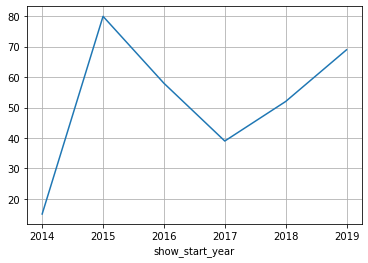

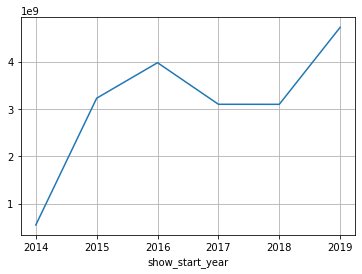

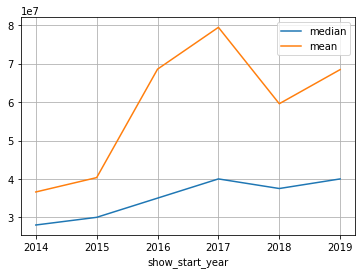

In [120]:
# построим график кол-ва фильмов с поддержкой по годам
df_support_pivot['count'].plot(grid=True)
plt.show()
# построим график суммы господдержки по годам
df_support_pivot['sum'].plot(grid=True)
plt.show()
# построим график медианы и средней сумм поддержки по годам
df_support_pivot[['median','mean']].plot(grid=True)
plt.show()

Равномерного роста ни по кол-ву, ни по сумме выделенной поддержки не видно. Аналогично с общей базой 2017 год - в кол-ве провал, а медиана и среднее на пике. Но по сумме поддержки и 2017 и 2018 года ниже 2016 и 2019.

На сайте с открытыми данными https://ekinobilet.fond-kino.ru/government-support/ на сегодняшний день представлены данные 2015-2022 года.

| год  | кол-во на сайте | кол-во в базе проекта|
|:----:|:---------------:|:--------------------:|
| 2015 | 73              |80                    |
| 2016 | 79              |58                    |
| 2017 | 65              |39                    |
| 2018 | 57              |52                    |
| 2019 | 77              |69                    |

При сравнении видны расхождения:
* За 2015 год в базе строк больше. Это может быть связано с неявными дубликатами или с несколькими прокатными удостоверениями на один фильм.

* А по остальным годам информация в учебную базу точно загружена не полностью. 

Исходя из этого мы не можем корректно оценивать: был ли рост или снижение поддержки по предоставленной базе в рабочем проекте. Поэтому продолжаем исследование только в учебных целях, допуская то, что данные предоставлены в полном объеме.

По предоставленным данным: сумма предоставленной поддержки росла, но не равномерно. И кол-во фильмов получивших поддержку и вышедших в прокат по годам не равномерное.

Посмотрим на долю господдержки в бюджетах фильмов, а так же на доли возвратной и невозвратной частей в этой поддержке.

,show_start_year,budget,support,ratio_budget_support
0,2014,"1,279,484,783.00","549,002,299.00",43.00
1,2015,"7,309,669,207.00","3,227,241,459.00",44.00
2,2016,"7,228,942,748.00","3,977,155,482.00",55.00
3,2017,"6,972,172,568.00","3,098,971,662.00",44.00
4,2018,"6,651,694,634.00","3,098,000,000.00",47.00
5,2019,"12,542,866,609.00","4,724,000,000.00",38.00


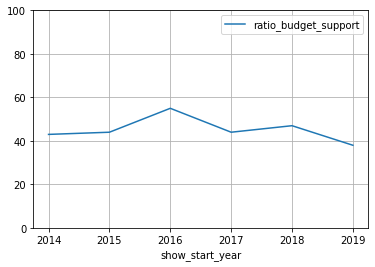

In [121]:
# создадим сводную таблицу df_support_pivot_budget с информацией о гос. поддержке по годам 2014-2019
df_support_pivot_budget=df_support.query('show_start_year>2013').pivot_table(index='show_start_year'
              , values=['support','budget']
                       , aggfunc='sum').reset_index()
# добавим стобец ratio_budget_support с долей поддержки государства в бюджете фильмов
df_support_pivot_budget['ratio_budget_support']=(round((df_support_pivot_budget['support']
                                                        /df_support_pivot_budget['budget']*100),0)
                                                )
# отобразим сводную таблицу
display(df_support_pivot_budget)

# построим график доли господдержки по годам
df_support_pivot_budget.plot(x='show_start_year', y='ratio_budget_support', ylim=(0,100),grid=True);

Доля участия гос-ва в бюджетах фильмов не сильно менялась с годами. 38-55% расходов брало на себя государтсво. Посмотрим на доли возвратных и невозвратных частей этой поддержки.

,show_start_year,ratio_budget_support,ratio_support_refundable,ratio_support_nonrefundable
0,2014,43.00,13.00,87.00
1,2015,44.00,17.00,83.00
2,2016,55.00,23.00,77.00
3,2017,44.00,22.00,78.00
4,2018,47.00,19.00,81.00
5,2019,38.00,18.00,82.00


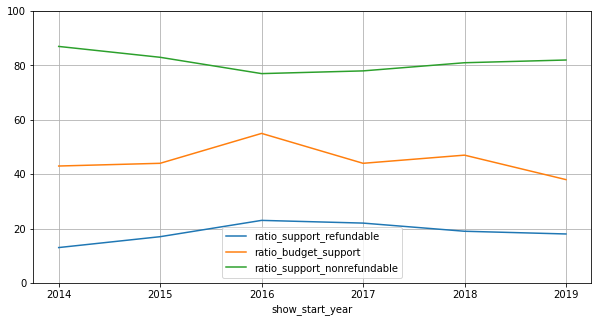

In [148]:
# добавим в df_support_pivot_budget столбцы с суммами возвратной и невозвратной поддержки
df_support_pivot_budget=(df_support_pivot_budget
                         .merge(df_support.query('show_start_year>2013')
                                .pivot_table(index='show_start_year'
                                             , values=['refundable_support','nonrefundable_support']
                                             , aggfunc='sum')
                                .reset_index(), on='show_start_year', how='outer'))

# добавим стобец ratio_support_refundable с долей возвратной части от поддежки
df_support_pivot_budget['ratio_support_refundable']=(round((df_support_pivot_budget['refundable_support']
                                                        /df_support_pivot_budget['support']*100),0)
                                                )
# добавим стобец ratio_support_nonrefundable с долей невозвратной части от поддежки
df_support_pivot_budget['ratio_support_nonrefundable']=(round((df_support_pivot_budget['nonrefundable_support']
                                                        /df_support_pivot_budget['support']*100),0)
                                                )
# отобразим сводную таблицу
display(df_support_pivot_budget[['show_start_year','ratio_budget_support'
                                 ,'ratio_support_refundable','ratio_support_nonrefundable']])

# построим график долей господдержки по годам с возвратной и невозвратной частью
df_support_pivot_budget.plot(x='show_start_year'
                             , y=['ratio_support_refundable','ratio_budget_support','ratio_support_nonrefundable']
                             , ylim=(0,100)
                             ,grid=True
                             ,figsize=(10,5)
                            );


Видно, что к 2016 году тенденция шла к уменьшению невозвратной доли и к увеличению возвратной (также в 2016 году доля поддержки в бюджете была выше, чем в остальные годы) Но, после 2016 графики опять расходятся.

Известно, что не все компании возвращают долги по государственному финансированию. Об этом говорит список должников на вкладке "Неисполненные обязательства" на сайте https://ekinobilet.fond-kino.ru/government-support/.

Возможно, к 2017 году был виден рост должников за предыдущие годы и было принято решение сократить долю возвратной части поддержки. Проверить эту гипотезу на предоставленных данных мы не можем. Это останется лишь предположением.

Также можно предположить, что на съемки фильма уходит год-два. Соответственно, фильмы вышедшие в 2017 году были профинансированы после 2014 года, когда в экономике наметился кризис. 

#### Источники государственной поддержки
3. Какой источник финансирования чаще принимал участие в поддержке? А какой больше выделил денег?

,financing_source,count,sum
0,Министерство культуры,162,"4,804,161,000.00"
1,"Министерство культуры, Фонд кино",21,"1,162,431,354.00"
2,Фонд кино,130,"12,707,778,548.00"


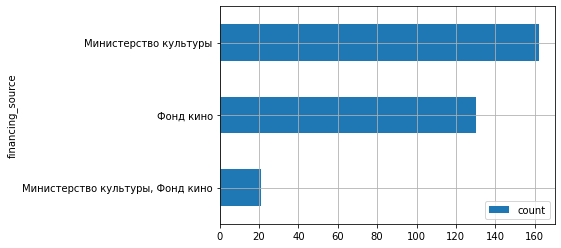

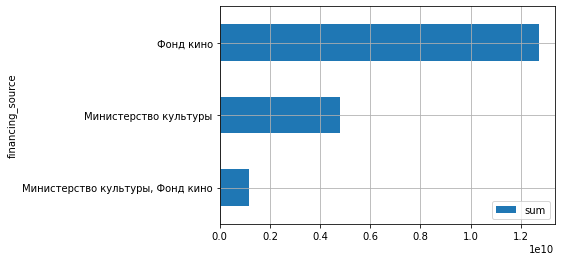

In [149]:
# создадим сводную таблицу df_support_pivot_financing_source с информацией о источниках гос. поддержке по годам 2014-2019
df_support_pivot_financing_source=(df_support.query('show_start_year>2013')[['show_start_year','support','financing_source']]
                                   .pivot_table(index='financing_source'
              , values='support'
                       , aggfunc=('count','sum')).reset_index())

# отобразим сводную таблицу
display(df_support_pivot_financing_source)

# построим график источников господдержки по кол-ву фильмов с поддержкой
df_support_pivot_financing_source.sort_values(by='count').plot(x='financing_source'
                                       , y='count', kind='barh'
                                       ,grid=True)
plt.show()
# построим график источников господдержки по сумме финансирования
df_support_pivot_financing_source.sort_values(by='sum').plot(x='financing_source'
                                       , y='sum', kind='barh'
                                       ,grid=True)
plt.show()

Минестерство культуры помогает чаще (162 фильма), а Фонд кино щедрее (12,7 млрд) Вместе они помогают редко, и сумма их совместной поддержки невелика.

Известно, что Министерство культуры обеспечивает поддержку дебютных, авторских, экспериментальных, детских и молодежных кинопроектов, а Фонд кино финансирует ленты с большим кассовым потенциалом. Интересно посмотреть на окупаемость фильмов с поддержкой.

#### Окупаемость фильмов с государственной поддержкой
4. Сколько фильмов окупилось, а сколько оказались убыточны? Как это связано с бюджетом? А с рейтингом?

Посмотрим, у скольких фильмов с государственной поддержкой нет данных по сборам.

In [150]:
# считаем пропуски в box_office
df_support['box_office'].isna().sum()

14

Из 315 строк всего у 14 нет данных по сборам. 4%, которые не помещают нам посмотреть на окупаемость фильмов с поддержкой.

Добавим в таблицу `df_support` столбцы:
- `profit` с прибылью фильма
- `profit_x` в котором посчитаем во сколько раз бюджет больше или меньше сборов
- `profit_cat` - с категориями 'провал','окупился'

In [151]:
# в столбец profit добавляем прибыль
df_support['profit']=df_support['box_office']-df_support['budget']

# в столбец profit_x добавляем кол-во бюджетов в прибыле
df_support['profit_x'] = round(df_support['profit']/df_support['budget']*100,0)

# добавим столбец profit_cat с двумя категориями прибыли
df_support['profit_cat'] = pd.cut(df_support.profit,[-2000000000,0,3000000000], 
                               labels=['провал','окупился'])
# смотрим первые 10 строк.head(10)

C:\Users\aivon\AppData\Local\Temp\ipykernel_5276\2205956521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_support['profit']=df_support['box_office']-df_support['budget']
C:\Users\aivon\AppData\Local\Temp\ipykernel_5276\2205956521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_support['profit_x'] = round(df_support['profit']/df_support['budget']*100,0)
C:\Users\aivon\AppData\Local\Temp\ipykernel_5276\2205956521.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

Сколько фильмов окупилось, а сколько провалились?

,count,sum
profit_cat,,
провал,235,"12,269,536,395.00"
окупился,66,"5,649,662,452.00"


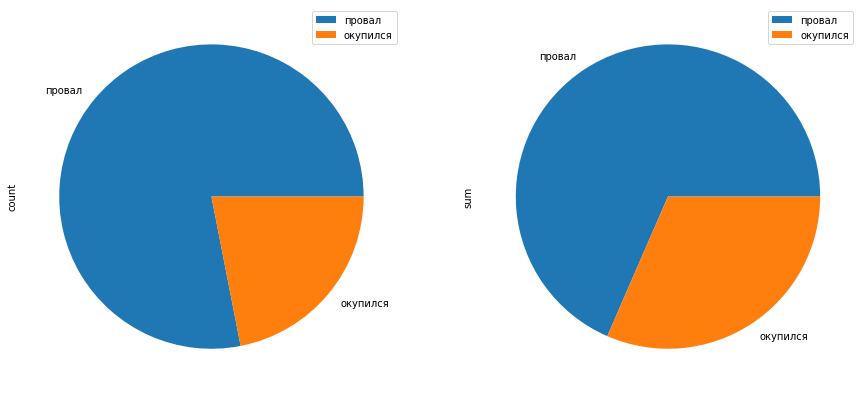

In [154]:
# отобразим сводную таблицу по кол-ву и суммам поддержки
display(df_support.pivot_table(index='profit_cat',values='support',aggfunc=('count','sum')))
# отобразим график по кол-ву
(df_support.pivot_table(index='profit_cat',values='support',aggfunc=('count','sum'))
 .plot(kind='pie', grid=True,subplots=True,figsize=(15,10))
);

Печально, но 80% фильмов из поддержанных были провальные. Немного лучше по суммам поддержки 30% выданных денег окупились.

Посмотрим, как прибыль зависит от бюджета для фильмов с государственной поддержкой.

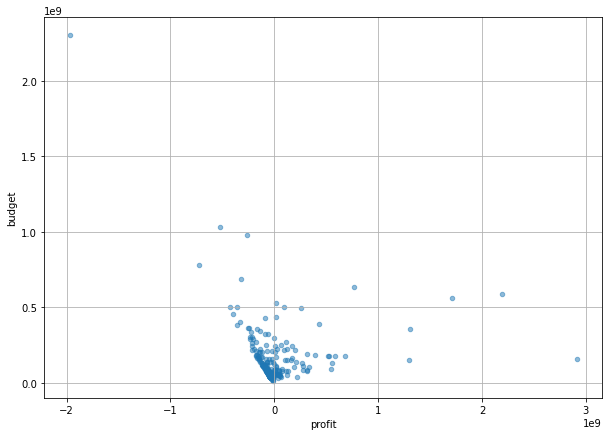

In [159]:
# построим график для profit и budget
df_support.plot(x='profit', y='budget', kind='scatter', figsize=(10,7), alpha=0.5, grid=True);

Есть 2 интересных случая: очень провальный по сборам с очень большим бюджетом и обратная ситуация. Посмотрим, что это за фильмы.

In [160]:
# отфильтруем фильмы с бюджетом больше 2 млрд или с прибылью больше 2,5 млрд
df_support.query('budget>2000000000 or profit>2500000000')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,ratio_support_budget,support,profit,profit_x,profit_cat
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00","90,000,000.00","2,305,074,303.00",Фонд кино,5.80,"приключения,фэнтези","333,597,059.59",2019,О.Степченко,приключения,12.00,"270,000,000.00","-1,971,477,243.41",-86.00,провал
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00","35,000,000.00","160,000,000.00",Фонд кино,6.80,комедия,"3,073,568,690.79",2019,К.Шипенко,комедия,38.00,"60,000,000.00","2,913,568,690.79","1,821.00",окупился


"Тайна Печати Дракона" - огромный бюджет в 2,3 млрд и сборы 333,5 млн. Полный провал. Хорошо, что 2/3 от поддержки были возвратными.

"Холоп" - очень успешный по сборам фильм (2,9 млрд) с относительно небольшим бюджетом 160млн (60 из них были государственные).

Посмотрим поближе фильмы с прибылью меньше 1млрд и бюджетом до 400 млн

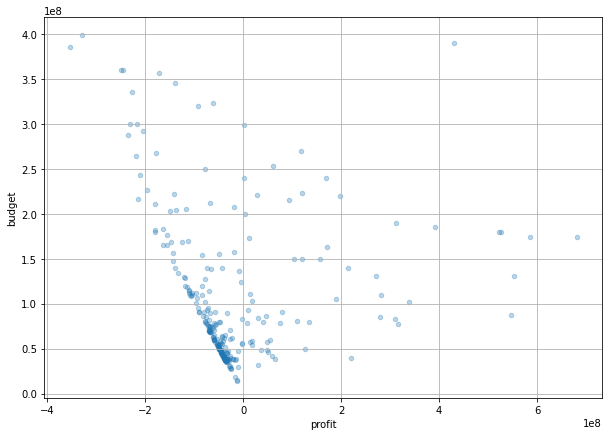

In [164]:
# построим график для profit меньше 1 млрд и budget до 400 млн
df_support.query('budget<400000000 and profit<1000000000')\
.plot(x='profit', y='budget', kind='scatter', figsize=(10,7), alpha=0.3, grid=True);

По более плотным участкам видна тенденция: чем больше бюджет, тем провальнее фильм.

А что с рейтингами? Посмотрим как соотносится успешность фильмов по рейтингам и кратности прибыли к бюджету.

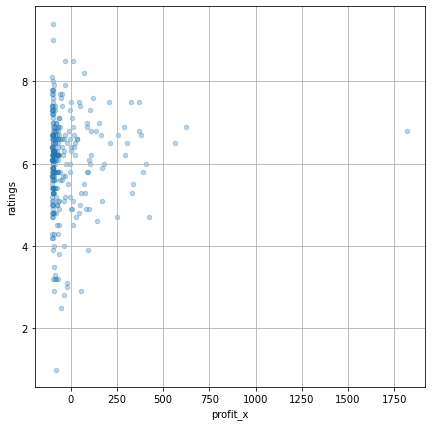

In [165]:
# построим график для ratings и profit_x
df_support.plot(x='profit_x', y='ratings', kind='scatter', figsize=(7,7), alpha=0.3, grid=True);

Снова выбивающийся фильм с большой разницей между бюджетом и прибылью.

In [166]:
# отфильтруем фильмы с кратностью больше 1500
df_support.query('profit_x>1500')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,ratio_support_budget,support,profit,profit_x,profit_cat
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00","35,000,000.00","160,000,000.00",Фонд кино,6.80,комедия,"3,073,568,690.79",2019,К.Шипенко,комедия,38.00,"60,000,000.00","2,913,568,690.79","1,821.00",окупился


Прибыль в 1821 раз больше бюджета полный успех! А рейтинг не очень высокий: 6,8 - скорее ближе к среднему. Посмотрим на провалившиеся фильмы по сборам.

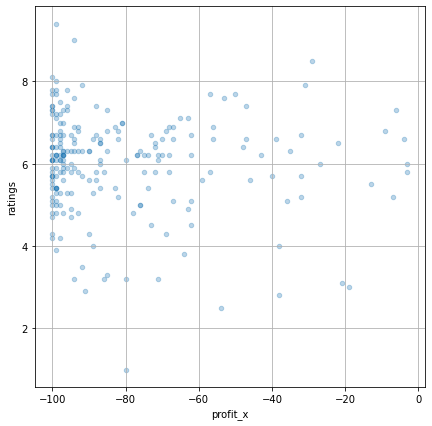

In [167]:
# построим график для profit_x меньше 0
df_support.query('profit_x<0').plot(x='profit_x', y='ratings', kind='scatter', figsize=(7,7), alpha=0.3, grid=True);

Большинство фильмов с бюджетом в 90-100 раз больше сборов... Но у некоторых очень хорошие рейтинги.

In [168]:
# отфильтруем фильмы с рейтингом больше 8,5
df_support.query('ratings>8.5')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,ratio_support_budget,support,profit,profit_x,profit_cat
2145,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,"10,000,000.00","40,000,000.00",Министерство культуры,9.40,"фантастика,боевик,комедия","334,750.00",2015,Ю.Кара,фантастика,25.00,"10,000,000.00","-39,665,250.00",-99.00,провал
3138,Я умею вязать,111019615,2015-11-27 12:00:00+00:00,Художественный,"ООО ""Белое Зеркало""",Россия,Н.Степанова при участии С.Иванова,"С.Кикнавелидзе, Д.Улюкаев",«16+» - для детей старше 16 лет,0.00,"4,700,000.00","14,462,464.00",Министерство культуры,9.00,драма,"801,370.00",2015,Н.Степанова при участии С.Иванова,драма,32.00,"4,700,000.00","-13,661,094.00",-94.00,провал


Фильм "Главный" и "Я умею вязать" - недооцененные фильмы.

И это очень высокий рейнинг. А сколько провальных по сборам фильмов с хорошим рейтингом выше 7?

In [169]:
# отфильтруем и посчитаем фильмы с рейтингом больше 7 и минусовым доходом
len(df_support.query('ratings>=7 and profit<0'))

38

38 из 301 фильма - 12,6%

С чем связаны провалы с показом этих фильмов по сборам? Скорее это говорит о том, что мало сделать хороший продукт, его надо еще уметь продать. Возможно, тут неудача именно с рекламной компанией, выбором времени для премьеры, не такие массовые сети взяли их в прокат.

Было бы интересно посмотреть на долю маркетинговых затрат для фильмов, распределению фильмов по сетям кинотеатров.

In [170]:
df_support['support'].sum(), df_support['box_office'].sum()

(18808718847.0, 39340175569.55)

18.8 млрд было выделенно из бюджета, а сборы по всем этим фильмам составили 39,3 млрд. Но при этом 20% фильмов и 30% поддержки имеют успех. Видна тенденция уменьшения сборов при увеличении бюджета фильма.

#### Жанры фильмов с государственной поддержкой 
5. Зависит ли поддержка государства от жанра фильма? Какие жанры больше всего поддерживаются государством?

,count,sum
main_genres,,
реальное ТВ,1,"53,000,000.00"
биография,3,"112,510,000.00"
детский,4,"119,000,000.00"
мюзикл,4,"240,453,119.00"
боевик,5,"254,000,000.00"
криминал,3,"280,000,000.00"
семейный,7,"339,000,000.00"
ужасы,10,"355,000,000.00"
мелодрама,14,"375,000,000.00"


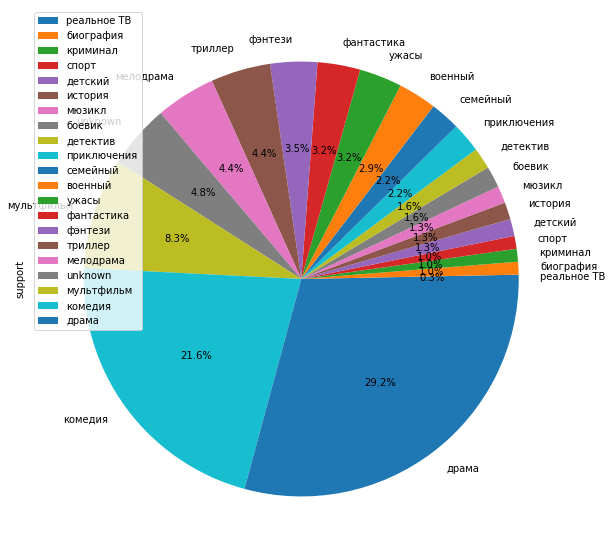

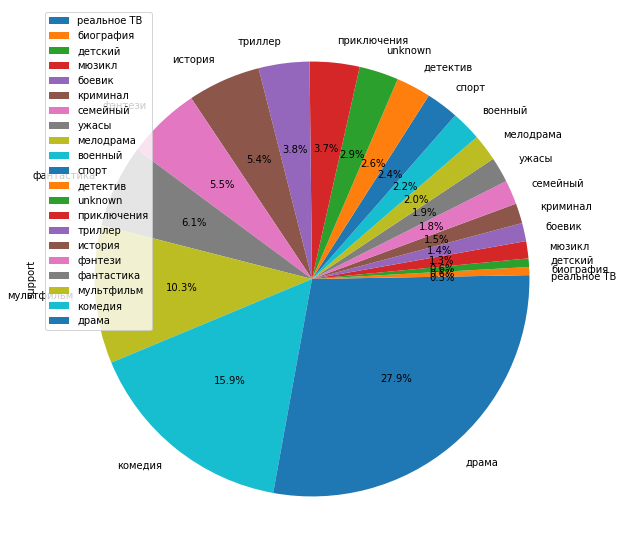

In [173]:
# отобразим сводную таблицу по кол-ву и суммам поддержки для разных жанров
display(df_support.pivot_table(index='main_genres',values='support',aggfunc=('count','sum')).sort_values(by='sum'))
# отобразим график по кол-ву
(df_support.pivot_table(index='main_genres',values='support',aggfunc='count')
 .sort_values('support')
 .plot(kind='pie', grid=True,figsize=(10,10),subplots=True,autopct='%1.1f%%')
)
plt.show()
# отобразим график по сумме поддержки
(df_support.pivot_table(index='main_genres',values='support',aggfunc='sum')
 .sort_values('support')
 .plot(kind='pie', grid=True,figsize=(10,10),subplots=True,autopct='%1.1f%%')
);


Драма (29-28%), комедия (22-16%) и мультфильм (8-10%) - лидеры и по кол-ву и по суммам выданных средств. Также видно 15 фильмов с неизвестными жанрами. От общего числа 315 это 4,7%. Небольшой процент не должен повлиять на искажение результатов исследования. Странный жанр "реальное ТВ" получил 1 раз поддержку в 53 млн.

profit_cat,провал,окупился
main_genres,,
спорт,1,2
реальное ТВ,1,0
биография,2,1
детский,3,0
история,3,1
криминал,3,0
семейный,3,3
боевик,4,1
мюзикл,4,0


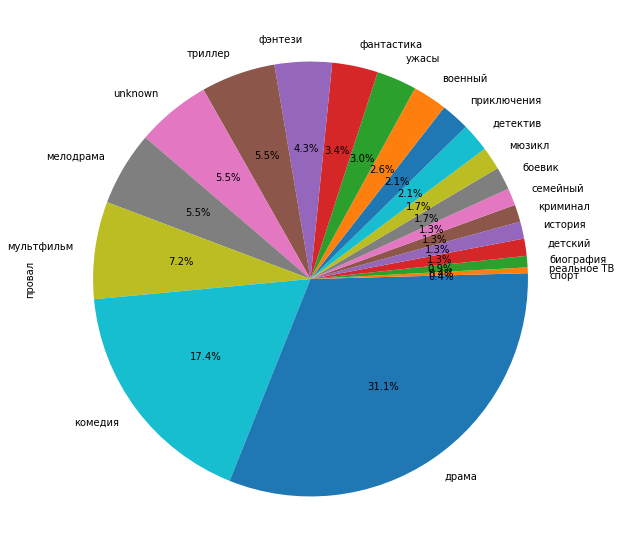

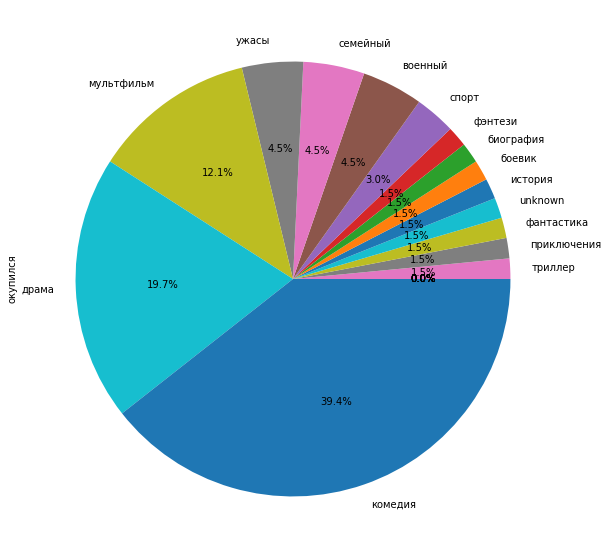

In [175]:
# отобразим сводную таблицу по кол-ву успешных и провальных фильмов для разных жанров
display(df_support[['main_genres','profit_cat','profit']]
        .pivot_table(index='main_genres',columns='profit_cat',values='profit_cat',aggfunc='count').sort_values(by='провал'))
# отобразим график по кол-ву
(df_support[['main_genres','profit_cat','profit']]
        .pivot_table(index='main_genres',columns='profit_cat',values='profit_cat',aggfunc='count')
 .sort_values(by='провал')['провал']
 .plot(kind='pie', grid=True,figsize=(10,10),autopct='%1.1f%%')
)
plt.show()
# отобразим график по сумме поддержки
(df_support[['main_genres','profit_cat','profit']]
        .pivot_table(index='main_genres',columns='profit_cat',values='profit_cat',aggfunc='count')
 .sort_values(by='окупился')['окупился']
 .plot(kind='pie', grid=True,figsize=(10,10),autopct='%1.1f%%')
);

Комедия обошла драму по окупаемости. На комедию денег давали реже (22% против 29%) и меньше(16% против 28%), но окупается она чаще (39% против 20%). А вот драма не оправдала возложенных надежд. 73 раза провалилась и только в 13 случаях имела успех в кинотеатрах.

#### Успешные жанры по всей базе
6. Какие жанры собирают большие кассы? Смотрим по всей базе, где есть сборы.

,count,sum
main_genres,,
фильм-нуар,1,"1,700.00"
короткометражка,1,"73,610.00"
концерт,2,"527,796.00"
для взрослых,1,"774,210.00"
детский,20,"4,338,643.00"
реальное ТВ,1,"32,721,103.43"
музыка,3,"49,974,590.08"
документальный,99,"232,753,312.22"
вестерн,5,"401,760,824.31"


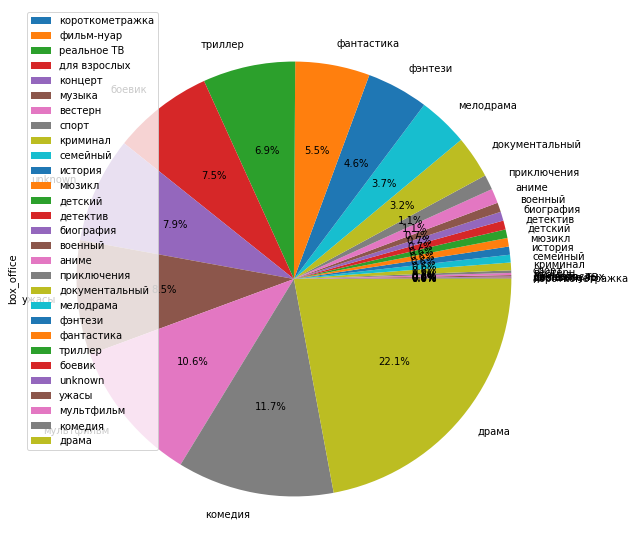

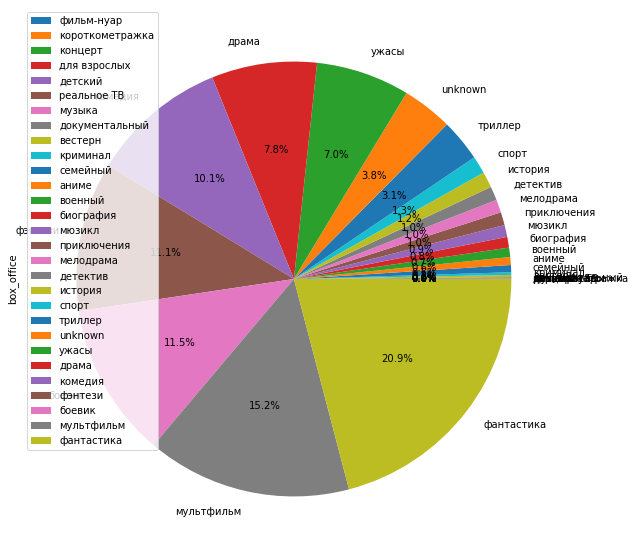

In [177]:
# отобразим сводную таблицу по кол-ву и суммам сборов для разных жанров
display(df_box_office.pivot_table(index='main_genres',values='box_office',aggfunc=('count','sum')).sort_values(by='sum'))
# отобразим график по кол-ву
(df_box_office.pivot_table(index='main_genres',values='box_office',aggfunc='count')
 .sort_values(by='box_office')
 .plot(kind='pie', grid=True,figsize=(10,10),subplots=True,autopct='%1.1f%%')
)
plt.show()
# отобразим график по сумме поддержки
(df_box_office.pivot_table(index='main_genres',values='box_office',aggfunc='sum')
 .sort_values(by='box_office')
 .plot(kind='pie', grid=True,figsize=(10,10),subplots=True,autopct='%1.1f%%')
);

Больше всего были прокаты фильмов в жанре "Драма" (22%) и "Комедия" (11.7%). А кассы больше у "Фантастики" (21%) и "Мультфильмов" (15%).

#### Российское кино
7. Какие отечественные фильмы самые успешные по рейтингу? А по сборам? Какие фильмы были поддержаны государством?

В этом пункте будем считать уникальные фильмы, поэтому проверим на дубликаты `df_russia`. Сначала будем смотреть на рейтинги отечественнго кинематографа. В колонке `ratings` есть пропуски. Посмотрим дубли на заполненных значениях рейтинга.

In [178]:
# считаем дубликаты по совпадениям в названиях, режиссере в базе с российским кино с известным рейтингом.
df_russia[df_russia['ratings'].isna()==False][['title','director']].duplicated().sum()

12

12 дубликатов. Рейтинг не колличественное значение, значит можно убрать дубликаты без сложения.

In [179]:
# в df_rus собираем строки с известным рейтингом и без дубликатов по названию и режиссеру
df_rus=df_russia[df_russia['ratings'].isna()==False].drop_duplicates(subset=['title','director'], keep=False)
# проверяем на дубликаты
df_rus[['title','director']].duplicated().sum()

0

Дубликаты удалены, можно смотреть на данные: посмотрим в российских фильмах каких рейтингов участвовало государство чаще.

,ratings_cat,budget,ratings,ratio
0,до 2,1,13,8.00
1,2-4,17,98,17.00
2,4-5,32,131,24.00
3,5-5.5,32,114,28.00
4,5.5-6,41,158,26.00
5,6-6.5,62,192,32.00
6,6.5-7,53,219,24.00
7,7-7.5,25,152,16.00
8,7.5-8,14,117,12.00
9,от 8,4,44,9.00


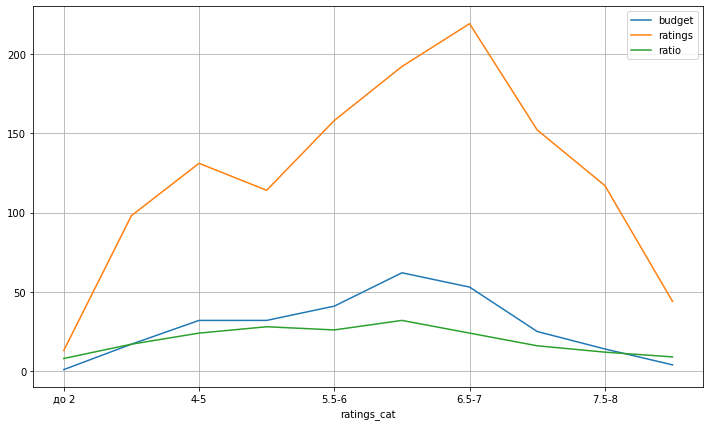

In [181]:
# в ratings_cat добавим категории в зависимости от значения в ratings
df_rus['ratings_cat'] = pd.cut(df_rus.ratings, [-1,2, 
                                                4,5,5.5, 
                                                6,6.5,7,
                                               7.5,8,8.5], 
                               labels=['до 2','2-4','4-5','5-5.5','5.5-6','6-6.5'
                                       ,'6.5-7','7-7.5','7.5-8','от 8'])

# отобразим сводную таблицу по кол-ву фильмов с с поддержкой и без по разным категориям рейтинга 
df_rus_pivot=df_rus.pivot_table(index='ratings_cat',values=['ratings','budget'],aggfunc=('count')).reset_index()

# в ratio добавим долю фильмов с поддержкой
df_rus_pivot['ratio']=round((df_rus_pivot['budget']/df_rus_pivot['ratings']*100),0)

# отобразим таблицу
display(df_rus_pivot)

# переназначим индексы для графика
df_rus_pivot.index=df_rus_pivot['ratings_cat']

# построим график
df_rus_pivot.plot(figsize=(12,7), grid=True);

Очень плохих фильмов по рейтингам в российском кино не так много (меньше 15% с рейтингом до 4), пик на 6,5-7 - вполне хороший показатель. Самая большая доля участия государства у рейтинга чуть ниже - 6-6,5, что тоже не плохо. Участие в самых провальных и самых успешных проектах 8-9%. Фильмов с невысоким рейтингом 5-5,5 не много, но доля поддержанных фильмов в этой категории достаточно большая 28%.

Посмотрим на сборы отечественного кино. Сначала проверим на дубликаты `df_russia` в строчках, где заполнены сборы.

In [182]:
# считаем дубликаты по совпадениям в названиях, режиссере в базе с российским кино с известными сборами.
df_box_office_russia=df_box_office.query('production_country=="Россия"')
df_box_office_russia[['title','director']].duplicated().sum()

0

Дубликатов нет.

,box_office_cat,box_office,budget,ratio
0,до 1млн,394,70,18.00
1,1-5млн,108,43,40.00
2,1-50млн,119,71,60.00
3,50-500млн,117,83,71.00
4,500млн-1млрд,15,14,93.00
5,от 1млрд,8,6,75.00


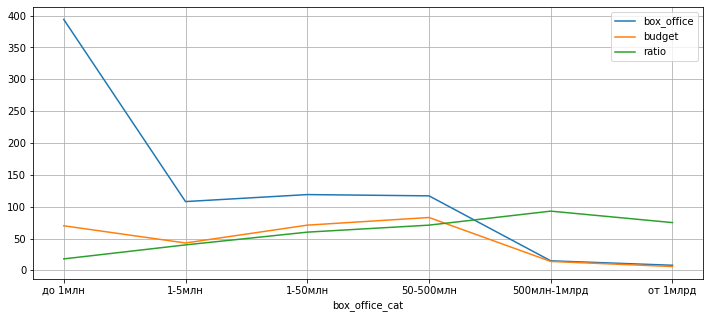

In [184]:
# отобразим сводную таблицу по кол-ву фильмов с с поддержкой и без по разным категориям рейтинга 
df_rus_box_pivot=df_box_office_russia.pivot_table(index='box_office_cat'
                                                  ,values=['box_office','budget']
                                                  ,aggfunc=('count')).reset_index()

# в ratio добавим долю фильмов с поддержкой
df_rus_box_pivot['ratio']=round((df_rus_box_pivot['budget']/df_rus_box_pivot['box_office']*100),0)

# отобразим таблицу
display(df_rus_box_pivot)

# переназначим индексы для графика
df_rus_box_pivot.index=df_rus_box_pivot['box_office_cat']

# построим график
df_rus_box_pivot.plot(figsize=(12,5), grid=True);

Со сборами ситуация почти обратная. Много фильмов с маленькими сборами, и доля поддержки государтством там небольшая. Зато почти во всех фильмах со сборами от 500 млн есть поддержка от государства. (75-93%).

#### Вывод
1. Данные о господдержке имеются с 10.09.2013 по 26.12.2019. Известно, что первые фильмы, вышедшие с участием государства в финансировании были в 2011 году. Это говорит о том, что в базе представлены не все данные. Из тех данных, что представлены: 315 фильмов с государственной поддержкой (5% из них приходятся на меджународные проекты) и это 21% от всего российского кинематографа за 2013-2019 года, предстваленные в базе.

2. Равномерного роста ни по кол-ву проектов, ни по сумме выделенной поддержки не видно. Аналогично с общей базой 2017 год - в кол-ве провал, а медиана и среднее на пике. Но по сумме поддержки и 2017 и 2018 года ниже 2016 и 2019. При сравнении с открытыми данными https://ekinobilet.fond-kino.ru/government-support/ по кол-ву фильмов, еще раз убеждаемся, что данные не полные. По предоставленным данным: сумма предоставленной поддержки росла, но не равномерно. И кол-во фильмов получивших поддержку и вышедших в прокат по годам не равномерное. Доля участия гос-ва в бюджетах фильмов не сильно менялась с годами. 38-55% расходов брало на себя государство. Видно, что к 2016 году тенденция шла к уменьшению невозвратной доли и к увеличению возвратной (также в 2016 году доля поддержки в бюджете была выше, чем в остальные годы) Но, после 2016 ситуация меняется в обратную сторону.

3. Минестерство культуры помогает чаще (162 фильма), а Фонд кино щедрее (12,7 млрд) Вместе они помогают редко, и сумма их совместной поддержки невелика.

4. Печально, но 80% фильмов из поддержанных были провальные. Немного лучше по суммам поддержки: 30% выданных денег окупились. Также в основной массе видна тенденция: чем больше бюджет, тем провальнее фильм. Большинство фильмов с бюджетом в 90-100 раз больше сборов... Но 12,6% имели хороший рейтинг (больше 7) при нулевой прибыли. 18.8 млрд было выделенно из бюджета, а сборы по всем этим фильмам составили 39,3 млрд.

5. Драма (29-28%), комедия (22-16%) и мультфильм (8-10%) - лидеры и по кол-ву и по суммам выданных средств. По окупаемости: Комедия обошла драму по окупаемости. На комедию денег давали реже (22% против 29%) и меньше(16% против 28%), но окупается она чаще (39% против 20%). А вот драма не оправдала возложенных надежд. 73 раза провалилась и только в 13 случаях имела успех в кинотеатрах.

6. Больше всего были прокаты фильмов в жанре "Драма" (22%) и "Комедия" (11.7%). А кассы больше у "Фантастики" (21%) и "Мультфильмов" (15%)

7. Очень плохих фильмов по рейтингам в российском кино не так много (меньше 15% с рейтингом до 4), пик на 6,5-7 - вполне хороший показатель. Самая большая доля участия государства у рейтинга чуть ниже - 6-6,5, что тоже не плохо. Участие в самых провальных и самых успешных проектах 8-9%. Фильмов с невысоким рейтингом 5-5,5 не много, но доля поддержанных фильмов в этой категории достаточно большая 28%. Со сборами ситуация почти обратная. Много фильмов с маленькими сборами, и доля поддержки государтством там небольшая. Зато почти во всех фильмах со сборами от 500 млн есть поддержка от государства. (75-93%).

### Шаг 5. Напишите общий вывод

Итак, мы провели исследование с целью изучить рынок российского кинопроката и выявить текущие тренды. Выделить фильмы, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю. Заказчик этого исследования — Министерство культуры Российской Федерации.

Исследование проходило в 3 этапа:

**Изучение данных**

    Исходные данные были представлены в двух датасетах, опубликованными на портале открытых данных Министерства культуры, а также информацию с сайта КиноПоиск. После объединения в общей таблице информация о 7485 прокатах. 
    
    16 столбцов:
    9 - о фильме: название фильма, тип фильма, студия-производитель, страна-производитель, режиссёр, продюсер, возрастная категория, жанр фильма, рейтинг фильма на КиноПоиске
    3 - о прокате: номер прокатного удостоверения, дата премьеры фильма, сборы в рублях
    4 - о государственной поддержке: объём возвратных и невозвратных средств государственной поддержки, источник государственного финансирования, общий бюджет фильма

**Предобработка данных**
    
    На этапе предобработки изучили, и по возможности устранили пропуски, аномальные и редкие значения; рассчитали и добавили в таблицу дополнительные данные для анализа данных:
| % от общего  | проблема  | колонка                        | решение                                                  |
|:------------:|:---------:|:------------------------------:|:--------------------------------------------------------:|
| 0,1          | пропуски  |`director`                      | удалены                                                  |
| 13           | пропуски  |`genres`                        | заполнено `unknown`                                      |
| 96           | пропуски  |`nonrefundable_support`, `refundable_support`, `financing_source`, `budget`| оставлены     |
| 58           | пропуски  |`box_office`                    | оставлены                                                |
| 13           | пропуски  |`ratings`                       | оставлены                                                |
| 8            | пропуски  |`producer`                      | оставлены                                                |
| 0,2          | пропуски  |`film_studio`                   | оставлены                                                |
| 0,03         | пропуски  |`production_country`            | оставлены                                                |

Заголовки:
- исправили заголовок `puNumber` на `pu_number`, чтобы упростить работу с таблицей.

дубликаты:
- неявные дубликаты в `production_country`, `ratings`,  были максимально устранены.
- удалены лишние пробелы во всех текстровых ячейках.
- полностью не устранены неявные дубликаты в `title`, `film_studio`, `production_country`, `director`, `producer`, `genres`
- удалены два дублирующих номера в `pu_number` (4 строчки 0,05%)

аномалии:
- аномальные значение `budget` удалены (0,2% от общего числа данных)

тип данных:
- изменили тип данных у `show_start_date` на `datetime64`
- изменили тип данных у `ratings` на `float64`

добавлены столбцы:
- с информацией о годе проката `show_start_year`
- с именем и фамилией главного режиссёра `main_director`
- с основным жанром фильма `main_genres`
- с долей государственная поддержки от общего бюджета фильма `ratio_support_budget`

**Ответы на вопросы и выводы**

Целью исследования было: 
**I.Изучить рынок российского кинопроката и выявить текущие тренды**.
**II.Выделить фильмы, которые получили государственную поддержку.Hасколько такие фильмы интересны зрителю.**

В ходе исследования изучили данные и ответили на вопросы:
**I.Изучить рынок российского кинопроката и выявить текущие тренды**

**1. Сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных.**

Всего 42% строк с указанным размером сборов. Важно помнить, что учитываются не уникальные названия фильмов, а каждый отдельный прокат. С 2010г доля фильмов с указанной информацией о прокате в кинотеатрах растет. В 2015 году резкий рост, в 2017 - пик. В 2018 небольшое снижение.

Известно, что в 2015 году создана Единая федеральная автоматизированная информационная система сведений о показах фильмов в кинозалах (ЕАИС) для обеспечения прозрачности рынка и формирования базы данных для официальной статистики: все российские кинотеатры, осуществляющие коммерческий кинопоказ, были обязаны к ней подключиться. Возможно именно этим вызван рост сборов в 2015 году в базе.

Полнее всего представлен 2017 год - по 71% данных известны сборы.

С 2010 по 2016 год кол-во прокатов в кинотеатрах росло от 105 до 523, в 2017 был спад до 355 и потом опять рост до 529 в 2019 году. На рост указывает также положительная корреляция 0,9.

Чем обусловлен спад 2017 года? Можно предположить: с учетом того, что на создание фильма уходит несколько лет, а в 2014-2015 был кризис, к 2017 году фильмов выпустили меньше. Возможно, данные были выгружены не полностью, а выборочно. Или прокатов действительно было меньше.


**2. Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?**

Минимальная сумма сборов 2,4млн в 2010 году, максимальная 49млн в 2018г.

И тут корреляция положительная и близкая к единице, но нет провала в сборах в 2017 году, как в кол-ве прокатов.

Небольшое снижение в 2019 можеты быть связано с тем, что информация по 2019 году была еще не полностью заполнена на момент выгрузки базы.

**3. С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года. Сравним значения.**

И для медианы, и для средней корреляция чуть ниже, чем для суммы сборов и суммы прокатов (0,88 и 0,8), но она также положительна и близка к единице. Однако, максимум средней доходит до 136 млн в том же 2017 году, когда в кол-ве прокатов был спад, а медиана идет ровнее (максимум на 9,9 млн в том же 2017 году). По двум линиям ожидаемо почти прямая линия у нуля до 2013-2014г.

При подробном изучении фильмов за 2016-2018 года обнаружилось:

Фильмов-миллиардников в 2016-2018 года было в прокате почти одиннаковое кол-во (10-11). Зато менее успешных по сборам фильмов в 2017 году меньше:
 * до 1 млн в 2017-2018 почти в 2,5 раза меньше, чем в 2016.
 * 1-5 млн в 2017 почти в 2 раза меньше, чем в 2016 и 2018

И в целом по графику видно, что в 2016 году кол-во фильмов падает с ростом сборов, а в 2017 и 2018 растет до середины графика и потом все соединяются у отметки в 1 млрд и более.

Кроме того, важно отметить, что фильмов в категории 0,5-1млрд 2017 год в лидерах с заметным отрывом. Это объясняет то, что хотя 2018 был лидером по сумме сбора, но имел большее кол-во прокатов, 2017 год по качеству выходит на первое место: прокатов мало, но фильмы по сборам лучше. (И медиана, и среднее лишенее тому подтверждение)

**4. Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?** 

Возрастное ограничение сильно влияет на сборы. В зависимости от года разница по доходам в разных возрастных категориях немного отличается, но единый тренд сохраняется: 
* меньше всего сборов у категории 0+
* больше всего у категории 16+, 12+ и 6+
* категория 18+ собирает больше, чем 0+, но уступает остальным

Связано это скорее всего с объемом целевой аудитории. Дети до 6-ти лет редкие посетители кинотеатров. А фильмы категории 18+ на любителя. Больший сегмент ЦА кинотеатров приходятся на 16+, 12+ и 6+.


***
**II.Выделить фильмы, которые получили государственную поддержку.Hасколько такие фильмы интересны зрителю.**

**1. За какой период есть данные о государственной поддержке кинематографа? Какая доля Российского кинематографа за эти годы получила поддержку от государства? Есть ли среди фильмов с государственной поддержкой межународные проекты?**

Данные о господдержке имеются с 10.09.2013 по 26.12.2019. Известно, что первые фильмы, вышедшие с участием государства в финансировании были в 2011 году. Это говорит о том, что в базе представлены не все данные. Из тех данных, что представлены: 315 фильмов с государственной поддержкой (5% из них приходятся на меджународные проекты) и это 21% от всего российского кинематографа за 2013-2019 года, предстваленные в базе.

**2. Сколько фильмов ежегодно получали государственную поддежку? На какую сумму? Какую долю от бюджета фильма составляла эта поддержка? Как изменялась доля возвратной и невозвратной частей по годам?**

Равномерного роста ни по кол-ву проектов, ни по сумме выделенной поддержки не видно. Аналогично с общей базой 2017 год - в кол-ве провал, а медиана и среднее на пике. Но по сумме поддержки и 2017 и 2018 года ниже 2016 и 2019.

При сравнении с открытыми данными https://ekinobilet.fond-kino.ru/government-support/ по кол-ву фильмов, еще раз убеждаемся, что данные не полные:

| год  | кол-во на сайте | кол-во в базе проекта|
|:----:|:---------------:|:--------------------:|
| 2015 | 73              |80                    |
| 2016 | 79              |58                    |
| 2017 | 65              |39                    |
| 2018 | 57              |52                    |
| 2019 | 77              |69                    |


По предоставленным данным: сумма предоставленной поддержки росла, но не равномерно. И кол-во фильмов получивших поддержку и вышедших в прокат по годам не равномерное.

Доля участия гос-ва в бюджетах фильмов не сильно менялась с годами. 38-55% расходов брало на себя государство. Видно, что к 2016 году тенденция шла к уменьшению невозвратной доли и к увеличению возвратной (также в 2016 году доля поддержки в бюджете была выше, чем в остальные годы) Но, после 2016 ситуация меняется в обратную сторону.

**3. Какой источник финансирования чаще принимал участие в поддержке? А какой больше выделил денег?**
Минестерство культуры помогает чаще (162 фильма), а Фонд кино щедрее (12,7 млрд) Вместе они помогают редко, и сумма их совместной поддержки невелика.

Известно, что Министерство культуры обеспечивает поддержку дебютных, авторских, экспериментальных, детских и молодежных кинопроектов, а Фонд кино финансирует ленты с большим кассовым потенциалом. Интересно посмотреть на окупаемость фильмов с поддержкой.

**4. Сколько фильмов окупилось, а сколько оказались убыточны? Как это связано с бюджетом? А с рейтингом?**

Печально, но 80% фильмов из поддержанных были провальные. Немного лучше по суммам поддержки 30% выданных денег окупились.

Самый провальный:
"Тайна Печати Дракона" - огромный бюджет в 2,3 млрд и сборы 333,5 млн.

Самый успешный:
"Холоп" - очень успешный по сборам фильм (2,9 млрд) с относительно небольшим бюджетом 160млн (60 из них были государственные) Прибыль в 1821 раз больше бюджета полный успех!.

Также в основной массе видна тенденция: чем больше бюджет, тем провальнее фильм. Большинство фильмов с бюджетом в 90-100 раз больше сборов... Но 12,6% имели хороший рейтинг (больше 7) при нулевой прибыли.

С чем связаны провалы с показом этих фильмов по сборам? Скорее это говорит о том, что мало сделать хороший продукт, его надо еще уметь продать. Возможно, тут неудача именно с рекламной компанией, выбором времени для премьеры, не такие массовые сети взяли их в прокат.

Было бы интересно посмотреть на долю маркетинговых затрат для фильмов, распределению фильмов по сетям кинотеатров.

18.8 млрд было выделенно из бюджета, а сборы по всем этим фильмам составили 39,3 млрд.

**5. Зависит ли поддержка государства от жанра фильма? Какие жанры больше всего поддерживаются государством?**

Драма (29-28%), комедия (22-16%) и мультфильм (8-10%) - лидеры и по кол-ву и по суммам выданных средств. По окупаемости: Комедия обошла драму по окупаемости. На комедию денег давали реже (22% против 29%) и меньше(16% против 28%), но окупается она чаще (39% против 20%). А вот драма не оправдала возложенных надежд. 73 раза провалилась и только в 13 случаях имела успех в кинотеатрах.

**6. Какие жанры собирают большие кассы? Смотрим по всей базе, где есть сборы.**

Больше всего были прокаты фильмов в жанре "Драма" (22%) и "Комедия" (11.7%). А кассы больше у "Фантастики" (21%) и "Мультфильмов" (15%)

**7. Какие отечественные фильмы самые успешные по рейтингу? А по сборам? Какие фильмы были поддержаны государством?**

Очень плохих фильмов по рейтингам в российском кино не так много (меньше 15% с рейтингом до 4), пик на 6,5-7 - вполне хороший показатель. Самая большая доля участия государства у рейтинга чуть ниже - 6-6,5, что тоже не плохо. Участие в самых провальных и самых успешных проектах 8-9%. Фильмов с невысоким рейтингом 5-5,5 не много, но доля поддержанных фильмов в этой категории достаточно большая 28%.

Со сборами ситуация почти обратная. Много фильмов с маленькими сборами, и доля поддержки государтством там небольшая. Зато почти во всех фильмах со сборами от 500 млн есть поддержка от государства. (75-93%).

**ИТОГ:**
Фильмы с государственной поддержкой: 
- средние по рейтингу
- чаще проекты убыточны
- не все приоритетные жанры при выдачи успешны в сборах: комедия имеет больший успех у зрителей среди фильмов с поддержкой. А если смотреть по всем предоставленным фильмам: кассы большие у фантастики и мультфильмов.
- 12,6% фильмов с хорошим рейтингом, но без успехов по сборам.
- всего государство поддерживает 21% от российских проектов. Чаще это средние по рейтингу. Доля государственной поддержки больше в успешных по сборам фильмах, чем в фильмах с маленькими сборами.

Для лучшего исследования нужна информация:
- максимально полные данные по прокатам
- иметь информацию о прокате фильма: затраты на маркетинг, кто прокатчик, ретроспектива или мировая премьера, онлайн-кинотеатр или нет
- знать год выхода фильма
- исполнители главных ролей
- оригинальный фильм или ремейк
- фильмы, которые так и не вышли в прокат получив государтсвенную поддержку
